## INSTALANDO E IMPORTANDO BIBLIOTECAS

In [209]:
!pip install pandas

In [210]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
%matplotlib inline
from datetime import date
from datetime import timedelta

In [211]:
## Configurando gráficos

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

import json
import decimal 
import matplotlib.dates as mdate

## LENDO E OBSERVANDO O DATASET

In [212]:
df = pd.read_csv("datasus.csv", delimiter = ";")

In [213]:
pd.options.display.max_columns = 999

In [214]:
df.head(10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,OUTRO_DES,PUERPERA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,MORB_DESC,VACINA,DT_UT_DOSE,MAE_VAC,DT_VAC_MAE,M_AMAMENTA,DT_DOSEUNI,DT_1_DOSE,DT_2_DOSE,ANTIVIRAL,TP_ANTIVIR,OUT_ANTIV,DT_ANTIVIR,HOSPITAL,DT_INTERNA,SG_UF_INTE,ID_RG_INTE,CO_RG_INTE,ID_MN_INTE,CO_MU_INTE,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,RAIOX_RES,RAIOX_OUT,DT_RAIOX,AMOSTRA,DT_COLETA,TP_AMOSTRA,OUT_AMOST,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,04/01/2022,1,02/01/2022,1,PE,001,1497.0,RECIFE,261160,HOSPITAL OSWALDO CRUZ,477,F,23/04/1929,92,3,3092,5,1,9.0,BRASIL,1,PE,001,1497.0,VITORIA DE SANTO ANTAO,261640.0,1.0,NaN,2.0,9.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,04/01/2022,PE,001,1497.0,RECIFE,261160.0,1.0,04/01/2022,26/01/2022,2.0,NaN,NaN,NaN,1.0,04/01/2022,1.0,NaN,1.0,12/01/2022,1.0,1.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,27/01/2022,17/01/2022,04/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,04/01/2022,1,02/01/2022,1,AL,1 MICRORREGIAO DE SAUDE,1533.0,MACEIO,270430,HOSPITAL DA MULHER DRA NISE DA SILVEIRA,9923837,F,29/03/1979,42,3,3042,5,4,9.0,BRASIL,1,AL,1 MICRORREGIAO DE SAUDE,1533.0,MACEIO,270430.0,2.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,DORSOLGIA,2.0,1,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,BRONCOESPASMO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,04/01/2022,AL,1 MICRORREGIAO DE SAUDE,1533.0,MACEIO,270430.0,1.0,04/01/2022,15/01/2022,1.0,6.0,NaN,NaN,1.0,05/01/2022,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,17/01/2022,17/01/2022,05/01/2022,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,2.0,3.0,NaN,09/01/2022,1.0,07/01/2022,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,26/07/2021,19/10/2021,NaN,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,NaN,NaN,85 - COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,216VCD013VA,219VCD271ZA,2
2,05/01/2022,1,03/01/2022,1,PR,11RS CAMPO MOURAO,1365.0,TERRA BOA,412720,HOSPITAL MUNICIPAL SAO JUDAS TADEU DE TERRA BOA,2567466,F,15/06/1993,28,3,3028,5,1,9.0,BRASIL,1,PR,11RS CAMPO MOURAO,1365.0,TERRA BOA,412720.0,1.0,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,"CEFALEIA, MIALGIA",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,05/01/2022,PR,11RS CAMPO MOURAO,1365.0,TERRA BOA,412720.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,05/01/2022,4.0,NASOFARINGEA,1.0,09/01/2022,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,

In [215]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381877 entries, 0 to 381876
Columns: 166 entries, DT_NOTIFIC to FNT_IN_COV
dtypes: float64(92), int64(12), object(62)
memory usage: 483.6+ MB


(381877, 166)

In [216]:
# Com base no dicionário de dados, selecionamos as variáveis abaixo

# https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/pdfs/dicionario_de_dados_srag_hosp_17_02_2022.pdf

In [217]:
df_saude = df[['CS_SEXO', 'NU_IDADE_N', 'SG_UF_NOT', 'ID_MN_INTE','CS_GESTANT', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 
              'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 
              'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 
               'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
               'OBES_IMC', 'OUT_MORBI', 'VACINA_COV', 'VACINA', 'ANTIVIRAL', 'DT_INTERNA',  
               'UTI', 'SUPORT_VEN', 'CLASSI_FIN', 'DT_EVOLUCA', 'EVOLUCAO']]

In [218]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381877 entries, 0 to 381876
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     381877 non-null  object 
 1   NU_IDADE_N  381877 non-null  int64  
 2   SG_UF_NOT   381877 non-null  object 
 3   ID_MN_INTE  333139 non-null  object 
 4   CS_GESTANT  381877 non-null  int64  
 5   NOSOCOMIAL  325067 non-null  float64
 6   AVE_SUINO   315858 non-null  float64
 7   FEBRE       303927 non-null  float64
 8   TOSSE       325882 non-null  float64
 9   GARGANTA    258371 non-null  float64
 10  DISPNEIA    311438 non-null  float64
 11  DESC_RESP   292276 non-null  float64
 12  SATURACAO   297202 non-null  float64
 13  DIARREIA    248891 non-null  float64
 14  VOMITO      250432 non-null  float64
 15  DOR_ABD     245047 non-null  float64
 16  FADIGA      254987 non-null  float64
 17  PERD_OLFT   241572 non-null  float64
 18  PERD_PALA   241306 non-null  float64
 19  FA

In [219]:
df_saude.head(10)

,CS_SEXO,NU_IDADE_N,SG_UF_NOT,ID_MN_INTE,CS_GESTANT,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COV,VACINA,ANTIVIRAL,DT_INTERNA,UTI,SUPORT_VEN,CLASSI_FIN,DT_EVOLUCA,EVOLUCAO
0,F,92,PE,RECIFE,5,2.0,9.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,2.0,04/01/2022,1.0,2.0,1.0,27/01/2022,1.0
1,F,42,AL,MACEIO,5,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,2.0,04/01/2022,1.0,1.0,4.0,17/01/2022,1.0
2,F,28,PR,TERRA BOA,5,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,05/01/2022,2.0,3.0,5.0,06/01/2022,1.0
3,F,79,SP,SAO PAULO,9,9.0,9.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,9.0,9.0,06/01/2022,2.0,2.0,5.0,11/01/2022,2.0
4,M,7,SP,REGISTRO,6,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,2.0,05/01/2022,1.0,2.0,1.0,13/01/2022,1.0
5,F,57,SE,PROPRIA,5,2.0,9.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,9.0,2.0,02/01/2022,2.0,1.0,4.0,14/01/2022,2.0
6,M,1,SC,FLORIANOPOLIS,6,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,9.0,2.0,06/01/2022,2.0,3.0,4.0,19/01/2022,1.0
7,F,69,BA,PALMAS DE MONTE ALTO,5,2.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,07/01/2022,2.0,1.0,4.0,07/01/2022,2.0
8,M,82,SP,CAMPINAS,6,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,NaN,NaN,09/01/2022,NaN,NaN,4.0,10/01/2022,2.0
9,F,1,SP,OSASCO,6,9.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,07/01/2022,1.0,2.0,4.0,10/02/2022,1.0


In [220]:
# removendo features que não tem de data de internação e saída

df_saude = df_saude.dropna(subset=['DT_INTERNA', 'DT_EVOLUCA'])

In [221]:
df_saude.head(10)

,CS_SEXO,NU_IDADE_N,SG_UF_NOT,ID_MN_INTE,CS_GESTANT,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,FATOR_RISC,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COV,VACINA,ANTIVIRAL,DT_INTERNA,UTI,SUPORT_VEN,CLASSI_FIN,DT_EVOLUCA,EVOLUCAO
0,F,92,PE,RECIFE,5,2.0,9.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,2.0,2.0,2.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,2.0,04/01/2022,1.0,2.0,1.0,27/01/2022,1.0
1,F,42,AL,MACEIO,5,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,2.0,04/01/2022,1.0,1.0,4.0,17/01/2022,1.0
2,F,28,PR,TERRA BOA,5,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,05/01/2022,2.0,3.0,5.0,06/01/2022,1.0
3,F,79,SP,SAO PAULO,9,9.0,9.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,9.0,9.0,06/01/2022,2.0,2.0,5.0,11/01/2022,2.0
4,M,7,SP,REGISTRO,6,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9.0,2.0,05/01/2022,1.0,2.0,1.0,13/01/2022,1.0
5,F,57,SE,PROPRIA,5,2.0,9.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,2.0,2.0,9.0,2.0,02/01/2022,2.0,1.0,4.0,14/01/2022,2.0
6,M,1,SC,FLORIANOPOLIS,6,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,2.0,9.0,2.0,06/01/2022,2.0,3.0,4.0,19/01/2022,1.0
7,F,69,BA,PALMAS DE MONTE ALTO,5,2.0,2.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,07/01/2022,2.0,1.0,4.0,07/01/2022,2.0
8,M,82,SP,CAMPINAS,6,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,NaN,NaN,09/01/2022,NaN,NaN,4.0,10/01/2022,2.0
9,F,1,SP,OSASCO,6,9.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,07/01/2022,1.0,2.0,4.0,10/02/2022,1.0


In [222]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261844 entries, 0 to 381873
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     261844 non-null  object 
 1   NU_IDADE_N  261844 non-null  int64  
 2   SG_UF_NOT   261844 non-null  object 
 3   ID_MN_INTE  246084 non-null  object 
 4   CS_GESTANT  261844 non-null  int64  
 5   NOSOCOMIAL  231546 non-null  float64
 6   AVE_SUINO   225688 non-null  float64
 7   FEBRE       213837 non-null  float64
 8   TOSSE       227681 non-null  float64
 9   GARGANTA    183270 non-null  float64
 10  DISPNEIA    220196 non-null  float64
 11  DESC_RESP   207129 non-null  float64
 12  SATURACAO   212064 non-null  float64
 13  DIARREIA    178648 non-null  float64
 14  VOMITO      179665 non-null  float64
 15  DOR_ABD     176118 non-null  float64
 16  FADIGA      182820 non-null  float64
 17  PERD_OLFT   173740 non-null  float64
 18  PERD_PALA   173605 non-null  float64
 19  FA

## TRATANDO O DATASET

In [223]:
## renomear as features colunas

In [224]:
df_saude = df_saude.rename(columns={'CS_SEXO':'SEXO', 'SG_UF_NOT':'UF', 'ID_MN_INTE':'MUNICIPIO', 
                        'NU_IDADE_N':'IDADE', 'CS_GESTANT':'GESTANTE', 'NOSOCOMIAL':'INFECCAO_HOSPITAL', 
                        'AVE_SUINO':'CONTATO_AVE_SUINO', 'FATOR_RISC':'COMORBIDADES', 'VACINA_COV':'VACINA_COVID', 
                        'VACINA':'VACINA_INFLUENZA', 'DESC_RESP':'DESCONF_RESP', 'DT_INTERNA':'DATA_INTERNACAO', 
                        'SUPORT_VEN':'SUPORT_VENTILATORIO', 'CLASSI_FIN':'DIAGNOSTICO', 'DT_EVOLUCA':'DATA_SAIDA'})

In [225]:
## inserimos na função as correções para termos somente dois dados únicos "SIM" e "NÃO"
## renomear respostas nas colunas conforme dicionário SRAG

In [226]:
def gestante(x):
    if x == 1:
        x = 'SIM'
    if x == 2:
        x = 'SIM'
    if x == 3:
        x = 'SIM'
    if x == 4:
        x = 'NAO'
    if x == 5:
        x = 'NAO'
    if x == 6:
        x = 'NAO'
    if x == 9:
        x = 'NAO'
    if x == 0:
        x = 'NAO'
    return x

df_saude['GESTANTE'] = df_saude['GESTANTE'].apply(lambda x: gestante(x))


def ventilacao(x):
    if x == 1:
        x = 'SIM'
    if x == 2:
        x = 'SIM'
    if x == 3:
        x = 'NAO'
    if x == 9:
        x = 'NAO'
    return x

df_saude['SUPORT_VENTILATORIO'] = df_saude['SUPORT_VENTILATORIO'].apply(lambda x: ventilacao(x))


def exame(x):
    if x == 1:
        x = 'INFLUENZA'
    if x == 2:
        x = 'VIROSE'
    if x == 3:
        x = 'VIROSE'
    if x == 4:
        x = 'VIROSE'
    if x == 5:
        x = 'COVID19'
    return x

df_saude['DIAGNOSTICO'] = df_saude['DIAGNOSTICO'].apply(lambda x: exame(x))


def evolucao(x):
    if x == 1:
        x = 'CURADO'
    if x == 2:
        x = 'OBITO'
    if x == 3:
        x = 'OBITO'
    if x == 9:
        x = 'CURADO'
    return x

df_saude['EVOLUCAO'] = df_saude['EVOLUCAO'].apply(lambda x: evolucao(x))


def vacina(x):
    if x == 1:
        x = 'VACINADO'
    if x == 2:
        x = 'NAO_VACINADO'
    if x == 3.0:
        x = 'NAO_VACINADO'
    if x == 9:
        x = 'NAO_VACINADO'
    return x

df_saude['VACINA_COVID'] = df_saude['VACINA_COVID'].apply(lambda x: vacina(x)) 
      
df_saude['VACINA_INFLUENZA'] = df_saude['VACINA_INFLUENZA'].apply(lambda x: vacina(x)) 


def anamnese(x):
    if x == 1:
        x = 'SIM'
    if x == 2:
        x = 'NAO'
    if x == 3.0:
        x = 'NAO'
    if x == 9:
        x = 'NAO'
    return x

df_saude['INFECCAO_HOSPITAL'] = df_saude['INFECCAO_HOSPITAL'].apply(lambda x: anamnese(x)) 
      
df_saude['CONTATO_AVE_SUINO'] = df_saude['CONTATO_AVE_SUINO'].apply(lambda x: anamnese(x)) 
      
df_saude['FEBRE'] = df_saude['FEBRE'].apply(lambda x: anamnese(x)) 
      
df_saude['TOSSE'] = df_saude['TOSSE'].apply(lambda x: anamnese(x)) 
      
df_saude['GARGANTA'] = df_saude['GARGANTA'].apply(lambda x: anamnese(x)) 
      
df_saude['DISPNEIA'] = df_saude['DISPNEIA'].apply(lambda x: anamnese(x)) 
      
df_saude['DESCONF_RESP'] = df_saude['DESCONF_RESP'].apply(lambda x: anamnese(x))
     
df_saude['SATURACAO'] = df_saude['SATURACAO'].apply(lambda x: anamnese(x)) 
      
df_saude['DIARREIA'] = df_saude['DIARREIA'].apply(lambda x: anamnese(x)) 
      
df_saude['VOMITO'] = df_saude['VOMITO'].apply(lambda x: anamnese(x)) 
      
df_saude['DOR_ABD'] = df_saude['DOR_ABD'].apply(lambda x: anamnese(x)) 
      
df_saude['FADIGA'] = df_saude['FADIGA'].apply(lambda x: anamnese(x)) 
      
df_saude['PERD_OLFT'] = df_saude['PERD_OLFT'].apply(lambda x: anamnese(x)) 
      
df_saude['PERD_PALA'] = df_saude['PERD_PALA'].apply(lambda x: anamnese(x)) 
      
df_saude['COMORBIDADES'] = df_saude['COMORBIDADES'].apply(lambda x: anamnese(x))

df_saude['CARDIOPATI'] = df_saude['CARDIOPATI'].apply(lambda x: anamnese(x))

df_saude['HEMATOLOGI'] = df_saude['HEMATOLOGI'].apply(lambda x: anamnese(x))

df_saude['SIND_DOWN'] = df_saude['SIND_DOWN'].apply(lambda x: anamnese(x))

df_saude['HEPATICA'] = df_saude['HEPATICA'].apply(lambda x: anamnese(x))

df_saude['ASMA'] = df_saude['ASMA'].apply(lambda x: anamnese(x))

df_saude['DIABETES'] = df_saude['DIABETES'].apply(lambda x: anamnese(x))

df_saude['NEUROLOGIC'] = df_saude['NEUROLOGIC'].apply(lambda x: anamnese(x))

df_saude['PNEUMOPATI'] = df_saude['PNEUMOPATI'].apply(lambda x: anamnese(x))

df_saude['IMUNODEPRE'] = df_saude['IMUNODEPRE'].apply(lambda x: anamnese(x))

df_saude['RENAL'] = df_saude['RENAL'].apply(lambda x: anamnese(x))

df_saude['OBESIDADE'] = df_saude['OBESIDADE'].apply(lambda x: anamnese(x))

df_saude['OBES_IMC'] = df_saude['OBES_IMC'].apply(lambda x: anamnese(x))

df_saude['OUT_MORBI'] = df_saude['OUT_MORBI'].apply(lambda x: anamnese(x))
      
df_saude['ANTIVIRAL'] = df_saude['ANTIVIRAL'].apply(lambda x: anamnese(x)) 
      
df_saude['UTI'] = df_saude['UTI'].apply(lambda x: anamnese(x))

## Olhando os dados faltantes

In [227]:
df_saude.isna().sum()

SEXO                        0
IDADE                       0
UF                          0
MUNICIPIO               15760
GESTANTE                    0
INFECCAO_HOSPITAL       30298
CONTATO_AVE_SUINO       36156
FEBRE                   48007
TOSSE                   34163
GARGANTA                78574
DISPNEIA                41648
DESCONF_RESP            54715
SATURACAO               49780
DIARREIA                83196
VOMITO                  82179
DOR_ABD                 85726
FADIGA                  79024
PERD_OLFT               88104
PERD_PALA               88239
COMORBIDADES                0
CARDIOPATI             138845
HEMATOLOGI             164179
SIND_DOWN              164533
HEPATICA               164578
ASMA                   161546
DIABETES               147689
NEUROLOGIC             159437
PNEUMOPATI             160088
IMUNODEPRE             162051
RENAL                  161669
OBESIDADE              162978
OBES_IMC               260407
OUT_MORBI              140877
VACINA_COV

## Substituir dados faltantes

In [228]:
df_saude.MUNICIPIO.fillna('IGNORADO',inplace=True)
df_saude.DIAGNOSTICO.fillna('VIROSE',inplace=True)
df_saude.EVOLUCAO.fillna('CURADO',inplace=True)
df_saude.VACINA_COVID.fillna('NAO_VACINADO',inplace=True)
df_saude.VACINA_INFLUENZA.fillna('NAO_VACINADO',inplace=True)
df_saude.fillna('NAO',inplace=True)

In [229]:
df_saude.isna().sum()

SEXO                   0
IDADE                  0
UF                     0
MUNICIPIO              0
GESTANTE               0
INFECCAO_HOSPITAL      0
CONTATO_AVE_SUINO      0
FEBRE                  0
TOSSE                  0
GARGANTA               0
DISPNEIA               0
DESCONF_RESP           0
SATURACAO              0
DIARREIA               0
VOMITO                 0
DOR_ABD                0
FADIGA                 0
PERD_OLFT              0
PERD_PALA              0
COMORBIDADES           0
CARDIOPATI             0
HEMATOLOGI             0
SIND_DOWN              0
HEPATICA               0
ASMA                   0
DIABETES               0
NEUROLOGIC             0
PNEUMOPATI             0
IMUNODEPRE             0
RENAL                  0
OBESIDADE              0
OBES_IMC               0
OUT_MORBI              0
VACINA_COVID           0
VACINA_INFLUENZA       0
ANTIVIRAL              0
DATA_INTERNACAO        0
UTI                    0
SUPORT_VENTILATORIO    0
DIAGNOSTICO            0


In [230]:
# Transformando String em número para o modelo a ser usado

In [231]:
df_saude.replace('SIM',1,inplace=True)
df_saude.replace('NAO',0,inplace=True)

In [232]:
df_saude.head()

,SEXO,IDADE,UF,MUNICIPIO,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COVID,VACINA_INFLUENZA,ANTIVIRAL,DATA_INTERNACAO,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,DATA_SAIDA,EVOLUCAO
0,F,92,PE,RECIFE,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,04/01/2022,1,1,INFLUENZA,27/01/2022,CURADO
1,F,42,AL,MACEIO,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,VACINADO,NAO_VACINADO,0,04/01/2022,1,1,VIROSE,17/01/2022,CURADO
2,F,28,PR,TERRA BOA,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,05/01/2022,0,0,COVID19,06/01/2022,CURADO
3,F,79,SP,SAO PAULO,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,06/01/2022,0,1,COVID19,11/01/2022,OBITO
4,M,7,SP,REGISTRO,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,05/01/2022,1,1,INFLUENZA,13/01/2022,CURADO


## Olhando dados únicos 

In [233]:
df_saude.nunique()

SEXO                      3
IDADE                   121
UF                       27
MUNICIPIO              1809
GESTANTE                  2
INFECCAO_HOSPITAL         2
CONTATO_AVE_SUINO         2
FEBRE                     2
TOSSE                     2
GARGANTA                  2
DISPNEIA                  2
DESCONF_RESP              2
SATURACAO                 2
DIARREIA                  2
VOMITO                    2
DOR_ABD                   2
FADIGA                    2
PERD_OLFT                 2
PERD_PALA                 2
COMORBIDADES              2
CARDIOPATI                2
HEMATOLOGI                2
SIND_DOWN                 2
HEPATICA                  2
ASMA                      2
DIABETES                  2
NEUROLOGIC                2
PNEUMOPATI                2
IMUNODEPRE                2
RENAL                     2
OBESIDADE                 2
OBES_IMC                255
OUT_MORBI                 2
VACINA_COVID              2
VACINA_INFLUENZA          2
ANTIVIRAL           

In [234]:
## Corrigir os valores de gestante e ave suino: gestante tinha como único "0" e ave_suino "3.0" 
## df_sp.GESTANTE.unique() & df_sp.CONTATO_AVE_SUINO.unique() FORAM CORRIGIDOS NA FUNÇÃO LAMBDA

In [235]:
df_saude.SEXO.unique()

array(['F', 'M', 'I'], dtype=object)

In [236]:
df_saude.drop(df_saude.index[df_saude['SEXO'] == 'I'], inplace = True)

In [237]:
df_saude.SEXO.unique()

array(['F', 'M'], dtype=object)

# Criar a Target: Tempo de Permanência

## Formatar colunas com data em datetime

In [238]:
## DATA_INTERNACAO 

## DATA_SAIDA

In [239]:
df_saude['DATA_INTERNACAO'] = pd.to_datetime(df_saude.DATA_INTERNACAO, format='%d/%m/%Y')

df_saude['DATA_SAIDA'] = pd.to_datetime(df_saude.DATA_SAIDA, format='%d/%m/%Y')

## Tempo de permanência (Data Entrada - Data Saída)

In [240]:
## CRIANDO VARIÁVEL PERMANENCIA > QUANTO TEMPO PACIENTE FICOU INTERNADO
## df['day + 10'] = df.date + pd.Timedelta(days=10)

In [241]:
df_saude['PERMANENCIA'] = (df_saude.DATA_SAIDA - df_saude.DATA_INTERNACAO).dt.days

## Indexar coluna do dia da internação

In [242]:
# Incluindo a data internação como indexador / índice

# df_sp.set_index('DATA_INTERNACAO', inplace=True)

In [243]:
df_saude.set_index('DATA_INTERNACAO', inplace=True)

In [244]:
# Retirando a data de saída, não mais necessário

In [245]:
df_saude = df_saude.drop(['DATA_SAIDA'], axis=1)

In [246]:
df_saude.head()

,SEXO,IDADE,UF,MUNICIPIO,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COVID,VACINA_INFLUENZA,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,EVOLUCAO,PERMANENCIA
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-04,F,92,PE,RECIFE,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,1,1,INFLUENZA,CURADO,23
2022-01-04,F,42,AL,MACEIO,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,VACINADO,NAO_VACINADO,0,1,1,VIROSE,CURADO,13
2022-01-05,F,28,PR,TERRA BOA,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,0,COVID19,CURADO,1
2022-01-06,F,79,SP,SAO PAULO,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,1,COVID19,OBITO,5
2022-01-05,M,7,SP,REGISTRO,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,1,1,INFLUENZA,CURADO,8


## Observando Permanência com dados igual a 0 dias

In [247]:
df_saude.loc[df_saude.PERMANENCIA==0]

,SEXO,IDADE,UF,MUNICIPIO,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COVID,VACINA_INFLUENZA,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,EVOLUCAO,PERMANENCIA
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-07,F,69,BA,PALMAS DE MONTE ALTO,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,1,0,1,VIROSE,OBITO,0
2022-01-05,F,8,MG,UBERLANDIA,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,1,0,0,VIROSE,CURADO,0
2022-01-20,M,73,SP,JUNDIAI,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,VACINADO,NAO_VACINADO,0,0,1,VIROSE,OBITO,0
2022-01-06,F,66,MS,TRES LAGOAS,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,NAO_VACINADO,NAO_VACINADO,0,0,1,INFLUENZA,CURADO,0
2022-01-20,F,67,SP,CAMPINAS,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,NAO_VACINADO,NAO_VACINADO,0,0,1,COVID19,OBITO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10,F,8,SP,HORTOLANDIA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,0,0,COVID19,CURADO,0
2022-06-01,M,90,SP,RIBEIRAO PRETO,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,VACINADO,NAO_VACINADO,0,1,1,COVID19,OBITO,0
2022-06-21,M,78,PR,ARAUCARIA,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,VACINADO,NAO_VACINADO,0,0,1,COVID19,CURADO,0


In [248]:
## Necessário somar mais um para contar o dia que ele saiu na subtração

df_saude['PERMANENCIA'] = (df_saude.PERMANENCIA + 1)

In [249]:
df_saude.sample(10)

,SEXO,IDADE,UF,MUNICIPIO,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COVID,VACINA_INFLUENZA,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,EVOLUCAO,PERMANENCIA
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-28,F,86,SC,BLUMENAU,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,VACINADO,VACINADO,0,0,1,COVID19,CURADO,3
2022-04-12,F,1,PR,ARAUCARIA,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,NAO_VACINADO,NAO_VACINADO,0,0,1,VIROSE,CURADO,3
2022-03-01,M,51,MG,JUIZ DE FORA,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,OBITO,10
2022-06-02,M,58,SP,SAO PAULO,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,CURADO,31
2022-06-25,F,68,MG,ALFENAS,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,VACINADO,VACINADO,0,1,1,COVID19,CURADO,7
2022-04-14,F,2,SP,BARUERI,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,0,1,VIROSE,CURADO,9
2022-02-04,F,84,RJ,NOVA FRIBURGO,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,CURADO,16
2022-01-14,F,67,RS,IGNORADO,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,CURADO,9
2022-03-20,M,2,RJ,NITEROI,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,1,0,VIROSE,CURADO,23


# TRATAMENTO DOS DADOS: NOVAS OBSERVAÇÕES E CORREÇÕES

In [250]:
#df_saude.info()

#df_saude.describe()

#df_saude(include=['object'])

In [251]:
df_saude.info()

df_saude.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261812 entries, 2022-01-04 to 2022-06-27
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SEXO                 261812 non-null  object
 1   IDADE                261812 non-null  int64 
 2   UF                   261812 non-null  object
 3   MUNICIPIO            261812 non-null  object
 4   GESTANTE             261812 non-null  int64 
 5   INFECCAO_HOSPITAL    261812 non-null  int64 
 6   CONTATO_AVE_SUINO    261812 non-null  int64 
 7   FEBRE                261812 non-null  int64 
 8   TOSSE                261812 non-null  int64 
 9   GARGANTA             261812 non-null  int64 
 10  DISPNEIA             261812 non-null  int64 
 11  DESCONF_RESP         261812 non-null  int64 
 12  SATURACAO            261812 non-null  int64 
 13  DIARREIA             261812 non-null  int64 
 14  VOMITO               261812 non-null  int64 
 15  DOR_ABD           

,IDADE,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,PERMANENCIA
count,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000,261812.000000
mean,50.902915,0.012417,0.029261,0.008048,0.487961,0.670454,0.136537,0.606645,0.498889,0.547393,0.080138,0.095591,0.059107,0.184568,0.018070,0.018903,0.595389,0.277512,0.010084,0.004744,0.009419,0.043218,0.177272,0.066250,0.060074,0.037741,0.042435,0.038279,0.277879,0.042355,0.279189,0.600721,10.212886
std,32.014108,0.110739,0.168539,0.089348,0.499856,0.470049,0.343358,0.488495,0.500000,0.497750,0.271507,0.294031,0.235826,0.387947,0.133206,0.136182,0.490818,0.447772,0.099910,0.068712,0.096593,0.203348,0.381900,0.248719,0.237624,0.190569,0.201580,0.191870,0.447954,0.201398,0.448601,0.489751,13.137138
min,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,61.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
75%,78.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,12.000000
max,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,833.000000


In [252]:
df_saude.describe(include=['object'])

,SEXO,UF,MUNICIPIO,OBES_IMC,VACINA_COVID,VACINA_INFLUENZA,DIAGNOSTICO,EVOLUCAO
count,261812,261812,261812,261812,261812,261812,261812,261812
unique,2,27,1809,255,2,2,3,2
top,M,SP,SAO PAULO,0,VACINADO,NAO_VACINADO,COVID19,CURADO
freq,132683,83598,20142,260376,155997,238214,133542,198236


## Olhando a Permanência e erros

In [253]:
df_saude.PERMANENCIA.describe()

count    261812.000000
mean         10.212886
std          13.137138
min           1.000000
25%           4.000000
50%           7.000000
75%          12.000000
max         833.000000
Name: PERMANENCIA, dtype: float64

In [254]:
def get_statistics(data, bins=20):
    '''Prints basic statistics from the input data. 
    Syntax: get_statistics(data, bins=20), where:
        data = the input data series;
        bins = the number of bins to the histogram.
    '''
    total = data.values
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))
    print('Median:', np.median(total))
    plt.hist(data, bins=bins);

Mean: 10.212885582020686
Standard deviation: 13.137112564254977
Minimum: 1
Maximum: 833
Median: 7.0


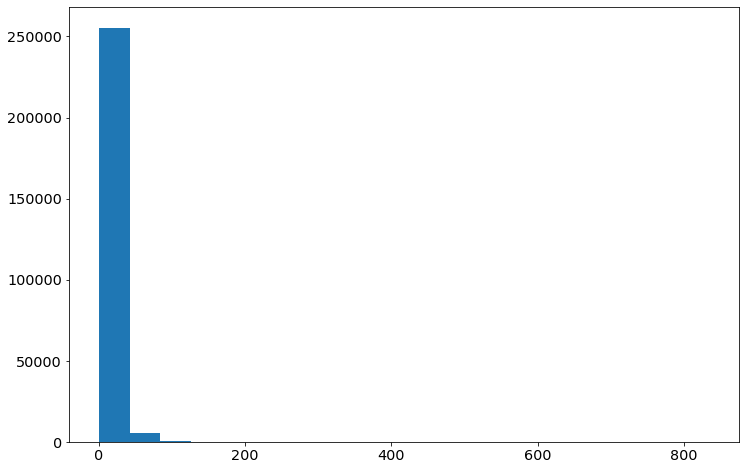

In [255]:
get_statistics(df_saude.PERMANENCIA)

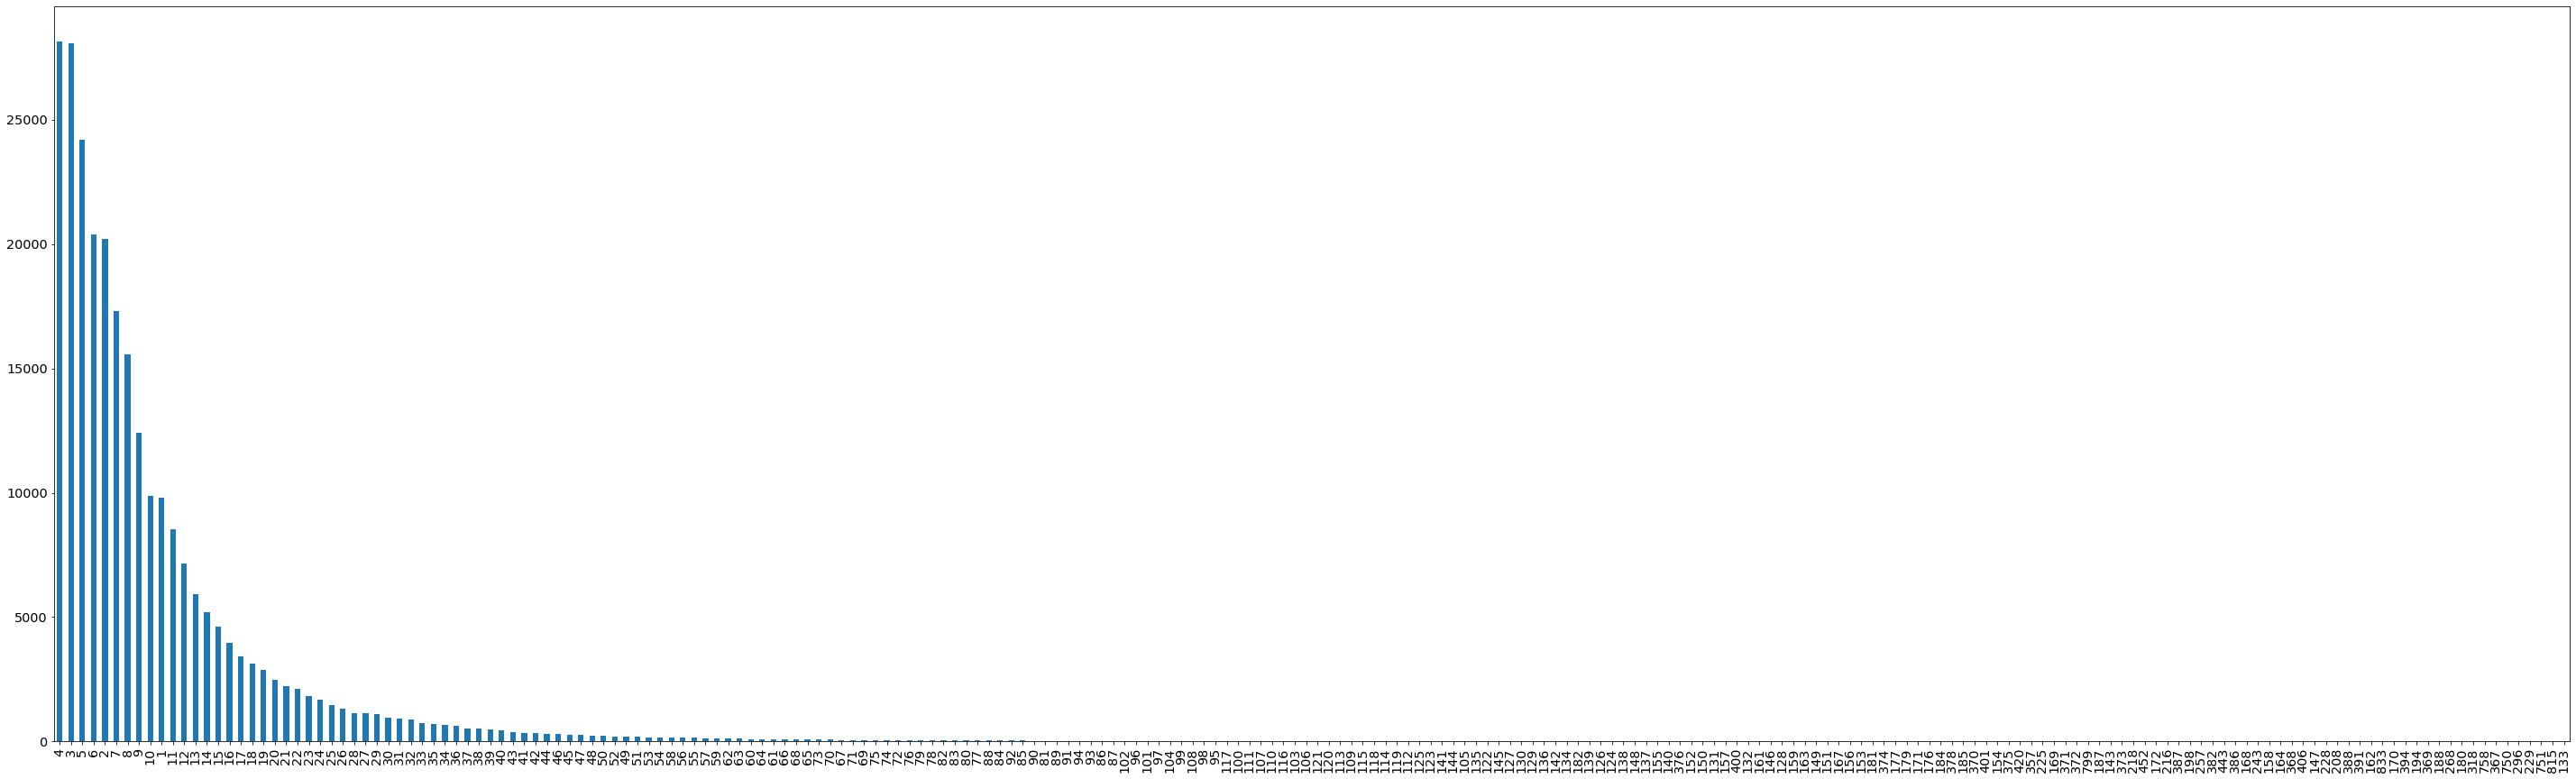

In [256]:
plt.figure(figsize=(50,15))
_ = df_saude['PERMANENCIA'].value_counts().plot(kind='bar')

In [257]:
df_saude['PERMANENCIA'].value_counts()

4      28147
3      28053
5      24189
6      20381
2      20204
       ...  
296        1
229        1
751        1
815        1
133        1
Name: PERMANENCIA, Length: 222, dtype: int64

In [258]:
# Observamos pessoas internadas com mais de 200 dias, chegando a 833 dias:
    # Sendo que até julho só seria possível permanecer 210 dias
    # Na gestão de leitos, pacientes que ficam mais de (ex: 30) dias são considerados pacientes residentes
    # Ou seja, assumem que já passaram tempo internado muito além do que preconizado para o tratamento 
    # devido a complicações e ao seu perfil ou diagnóstico

## Olhando a Idade e erros

In [259]:
df_saude.IDADE.describe()

count    261812.000000
mean         50.902915
std          32.014108
min          -9.000000
25%          13.000000
50%          61.000000
75%          78.000000
max         118.000000
Name: IDADE, dtype: float64

In [260]:
df_saude['IDADE'].value_counts()

 1      14419
 2      11574
 3       8315
 4       6315
 5       5004
        ...  
-9          1
 118        1
 112        1
 116        1
 113        1
Name: IDADE, Length: 121, dtype: int64

Mean: 50.902915068828015
Standard deviation: 32.014046615377495
Minimum: -9
Maximum: 118
Median: 61.0


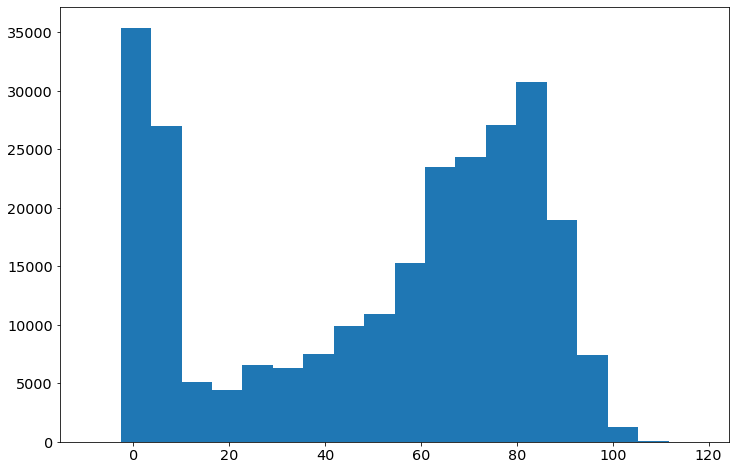

In [261]:
get_statistics(df_saude.IDADE)

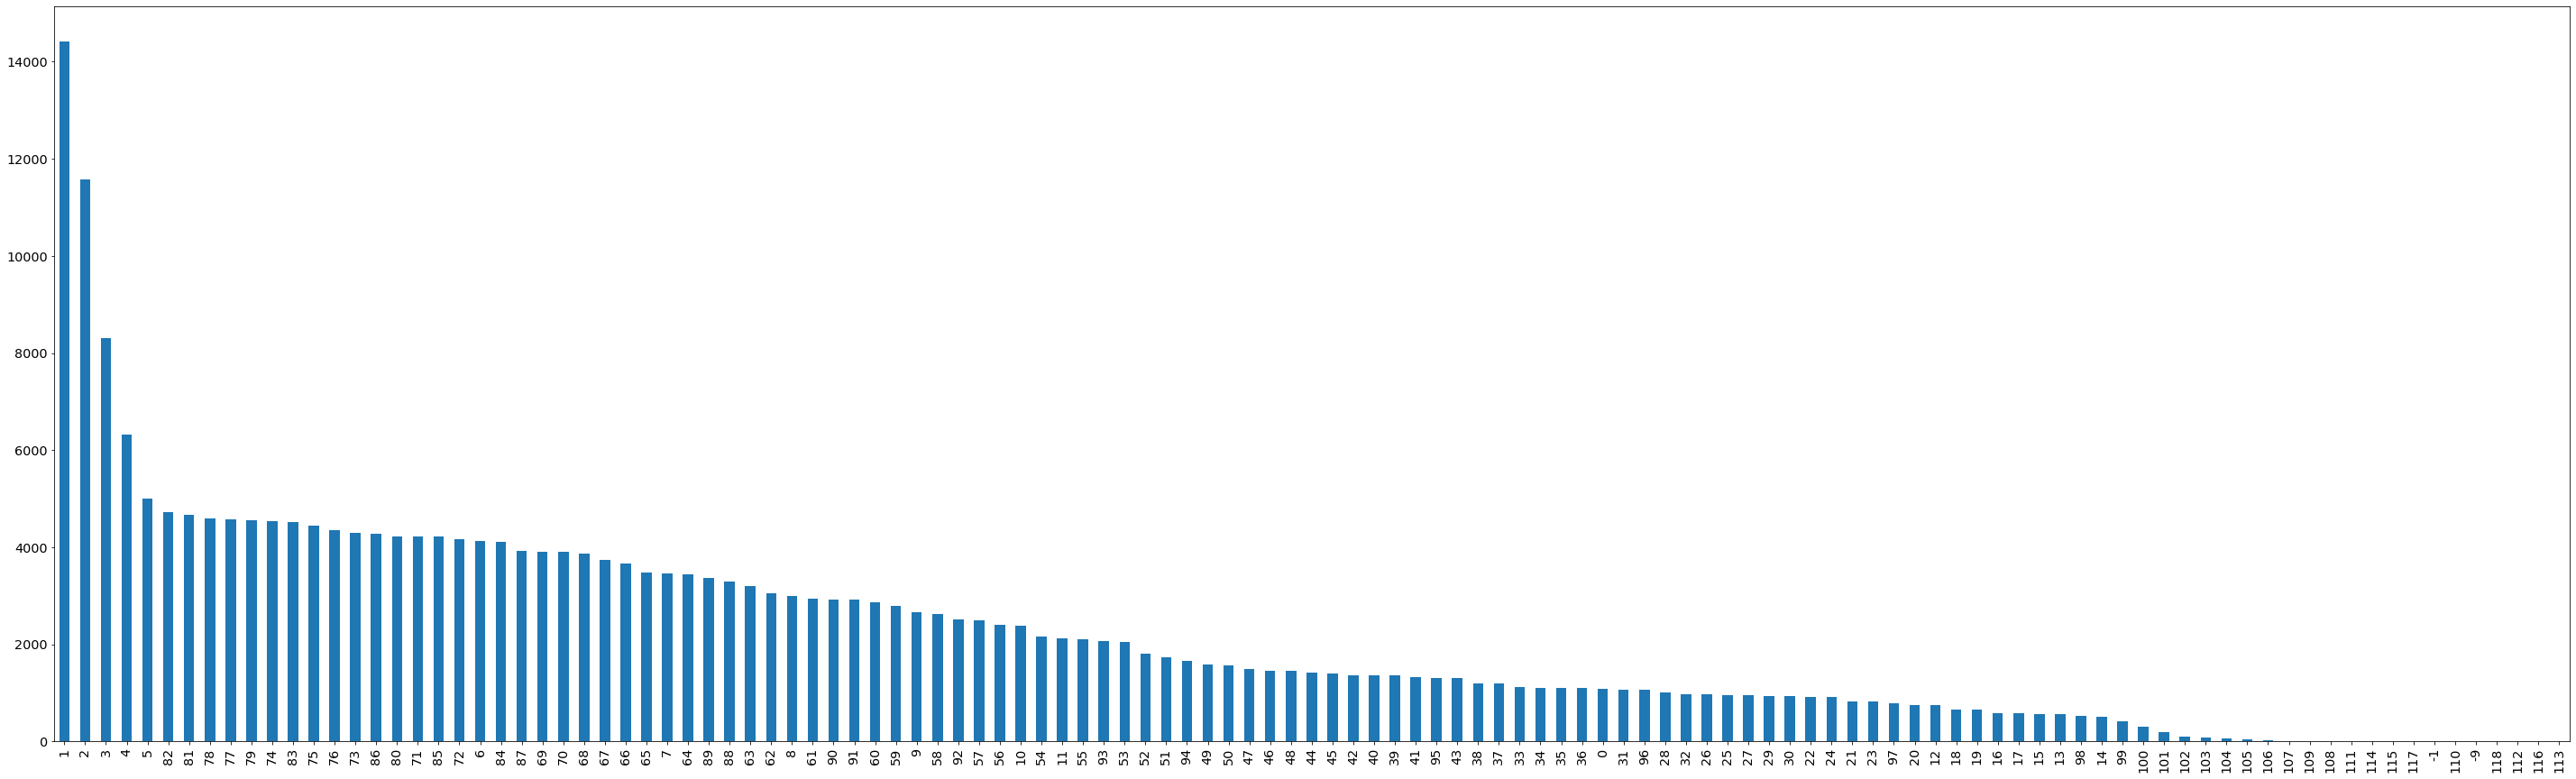

In [262]:
plt.figure(figsize=(50,15))
_ = df_saude['IDADE'].value_counts().plot(kind='bar')

In [263]:
# Aqui percebemos que temos dados errados. Idades negativas e pessoas com 118 anos (não é impossível, mas...)
    # df_teste = df_saude.drop(df_saude.index[df_saude['IDADE'] < 1], inplace = True)
    # df_teste = df_saude.drop(df_saude.index[df_saude['IDADE'] > 100], inplace = True)

## Avaliando Qtd de pacientes por UF

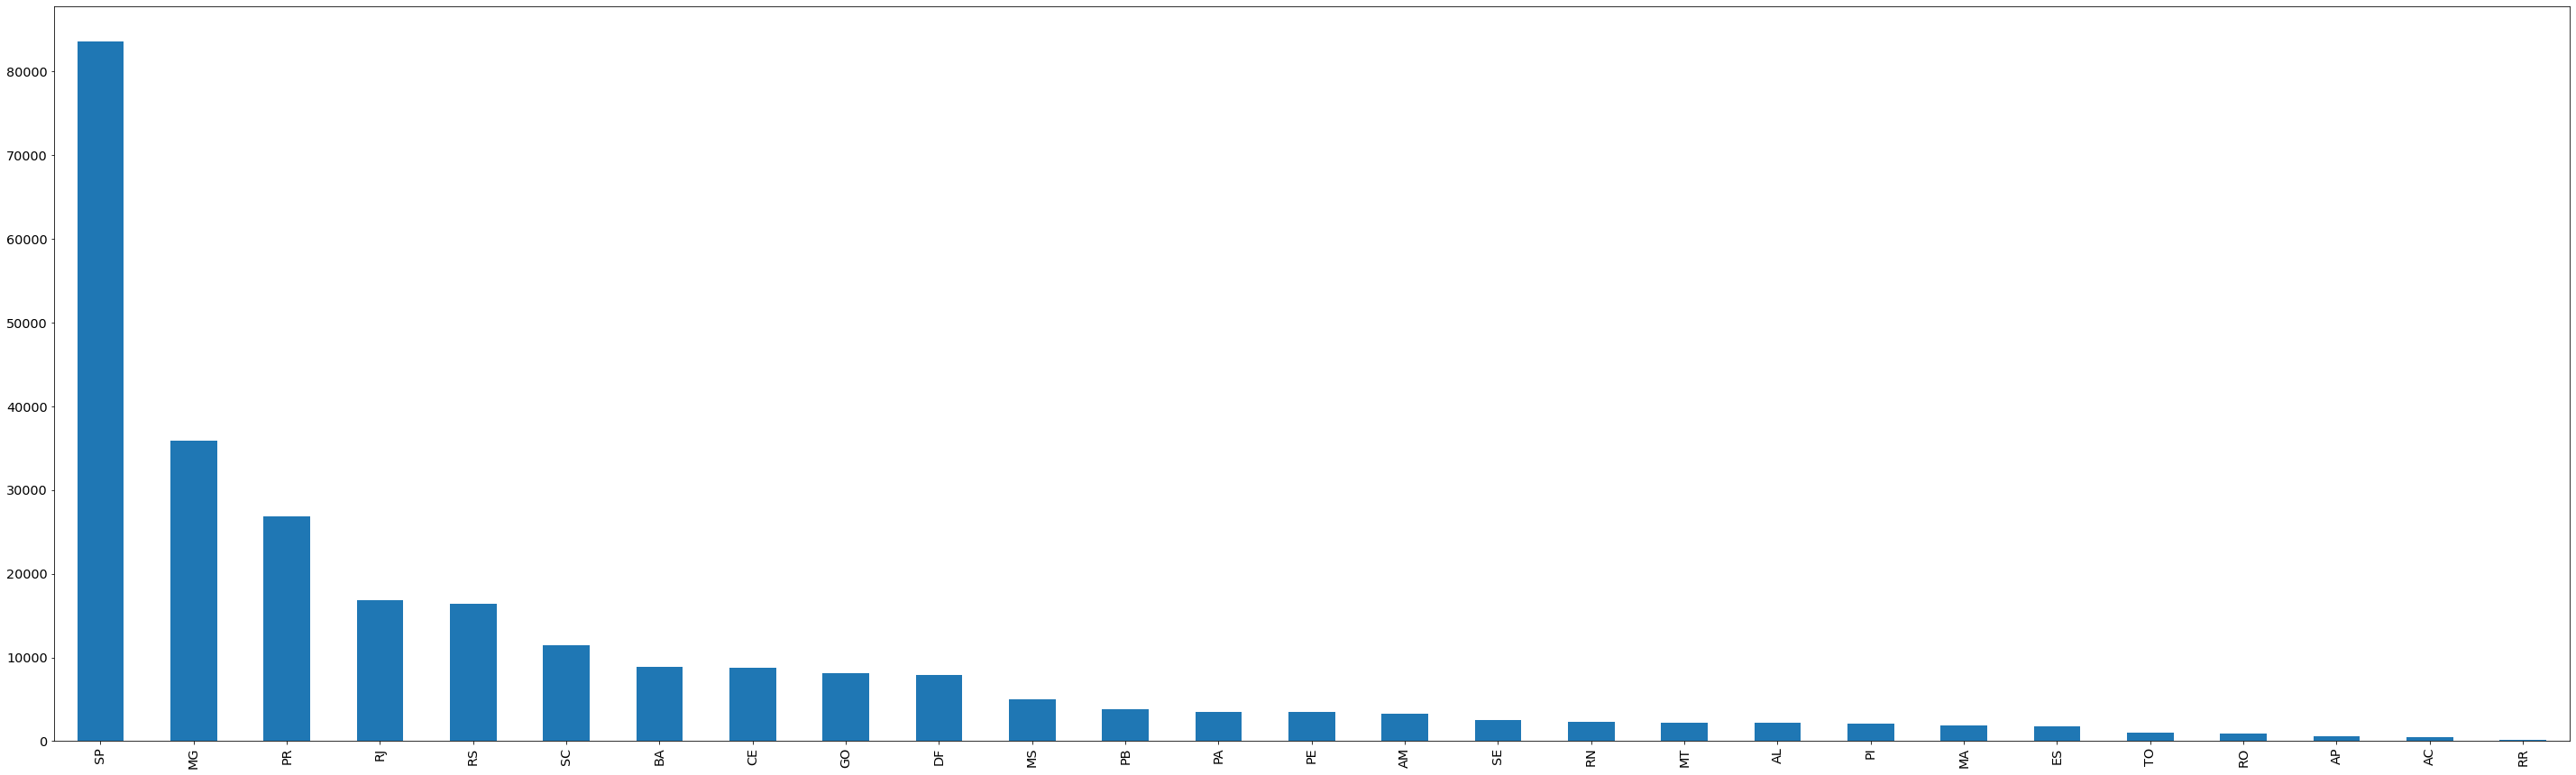

In [264]:
plt.figure(figsize=(50,15))
_ = df_saude['UF'].value_counts().plot(kind='bar')

In [265]:
# Podemos ver que SP lidera as internações

## Olhando Gestante e erros 

<AxesSubplot:xlabel='SEXO,GESTANTE'>

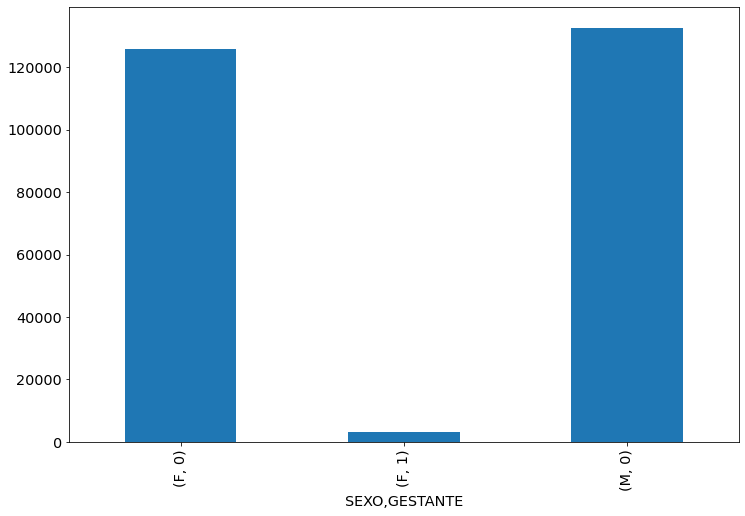

In [266]:
df_saude.groupby(['SEXO'])['GESTANTE'].value_counts().plot(kind='bar')

## Aplicando Correções

In [267]:
# Pensando em avaliar pessoas com idade mais avançada, sem o impacto de crianças, que tem maioria no dataset.

In [268]:
df_saude = df_saude.loc[df_saude.IDADE >= 16]

In [269]:
df_saude.IDADE.describe()

count    194918.000000
mean         66.888661
std          19.301476
min          16.000000
25%          56.000000
50%          71.000000
75%          82.000000
max         118.000000
Name: IDADE, dtype: float64

Mean: 66.88866087277727
Standard deviation: 19.301426599845918
Minimum: 16
Maximum: 118
Median: 71.0


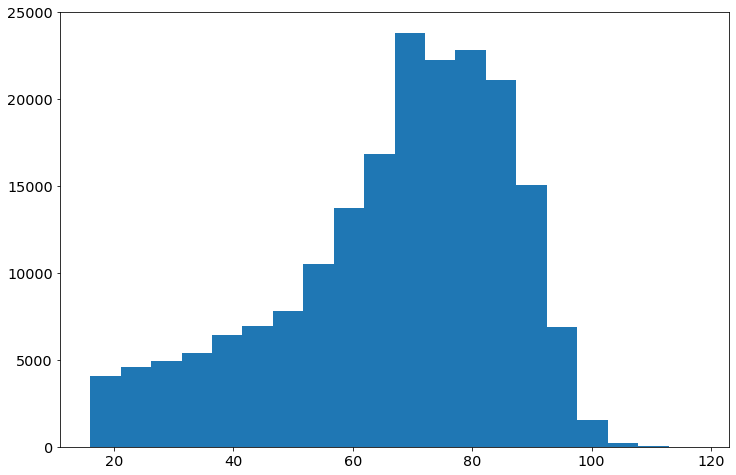

In [270]:
get_statistics(df_saude.IDADE)

<AxesSubplot:xlabel='IDADE', ylabel='Proportion'>

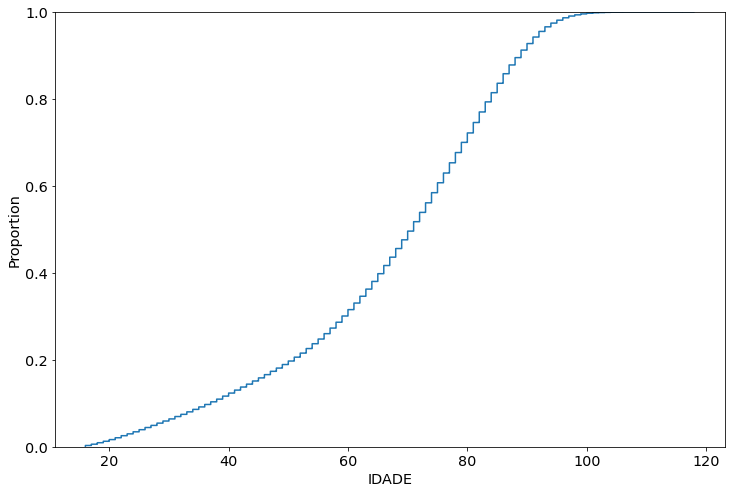

In [271]:
sns.ecdfplot(df_saude.IDADE)

In [272]:
## Ajustando a Permanência com base na proporção do data set 

<AxesSubplot:xlabel='PERMANENCIA', ylabel='Proportion'>

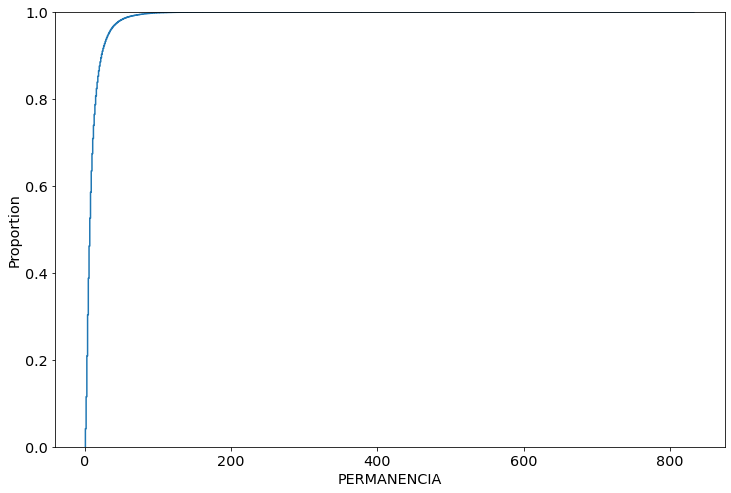

In [273]:
sns.ecdfplot(df_saude.PERMANENCIA)

In [274]:
df_saude = df_saude.loc[df_saude.PERMANENCIA <= 100]

<AxesSubplot:xlabel='PERMANENCIA', ylabel='Proportion'>

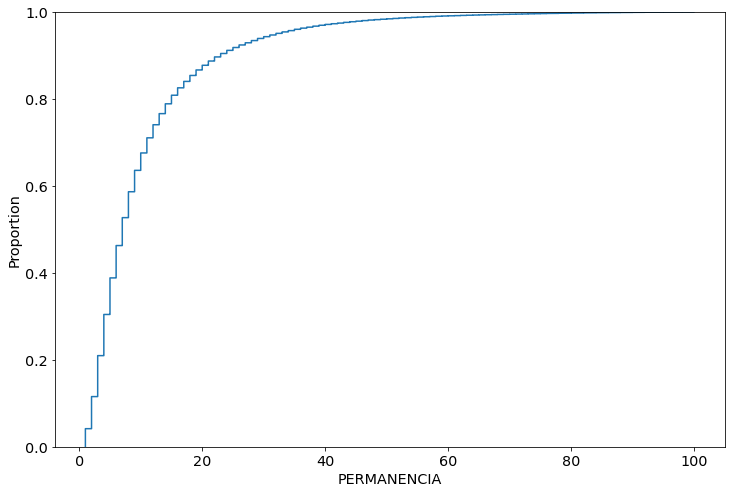

In [275]:
sns.ecdfplot(df_saude.PERMANENCIA)

In [276]:
df_saude.PERMANENCIA.describe()

count    194503.000000
mean         10.634854
std          11.240930
min           1.000000
25%           4.000000
50%           7.000000
75%          13.000000
max         100.000000
Name: PERMANENCIA, dtype: float64

In [277]:
df_saude = df_saude.loc[df_saude.PERMANENCIA <= 60]

<AxesSubplot:xlabel='PERMANENCIA', ylabel='Proportion'>

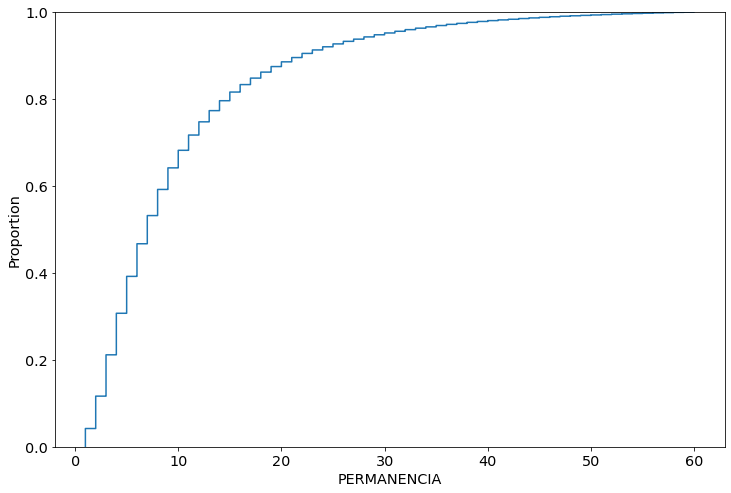

In [278]:
sns.ecdfplot(df_saude.PERMANENCIA)

In [279]:
df_saude.PERMANENCIA.describe()

count    192765.000000
mean         10.054974
std           9.426916
min           1.000000
25%           4.000000
50%           7.000000
75%          13.000000
max          60.000000
Name: PERMANENCIA, dtype: float64

## Analisando a Influência no tempo

<AxesSubplot:xlabel='DATA_INTERNACAO'>

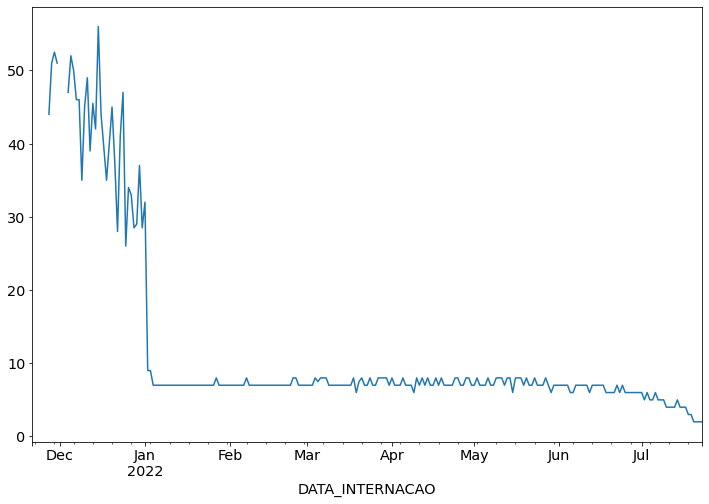

In [280]:
df_saude.PERMANENCIA.resample('D').median().plot()

<AxesSubplot:xlabel='DATA_INTERNACAO'>

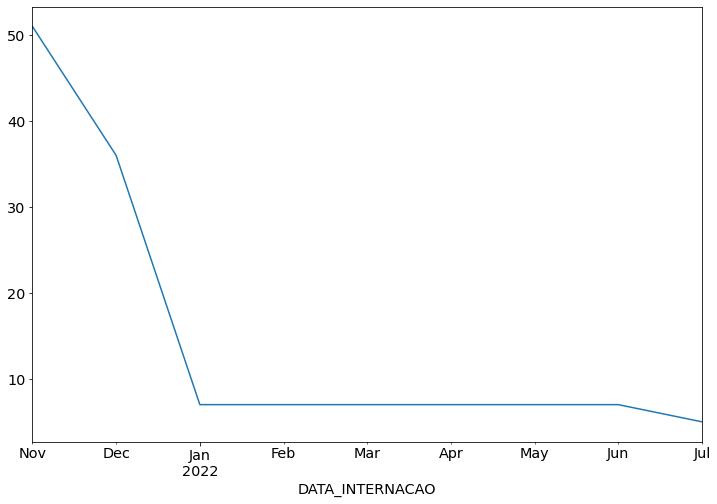

In [281]:
df_saude.PERMANENCIA.resample('M').median().plot()

In [282]:
# Olhar os períodos antes de 2022 não esperados neste dataset

In [283]:
df_saude.loc[df_saude.index<="01/01/2022"]

,SEXO,IDADE,UF,MUNICIPIO,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COVID,VACINA_INFLUENZA,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,EVOLUCAO,PERMANENCIA
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-28,F,75,TO,PALMAS,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,NAO_VACINADO,0,0,1,COVID19,OBITO,27
2021-12-27,M,53,SP,SAO PAULO,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,CURADO,37
2021-12-31,F,77,SP,SAO PAULO,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,0,COVID19,CURADO,35
2021-12-31,F,25,SP,SAO PAULO,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,0,INFLUENZA,CURADO,21
2021-12-29,M,47,RJ,RIO DE JANEIRO,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,NAO_VACINADO,NAO_VACINADO,0,1,1,COVID19,OBITO,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-14,M,62,SP,SAO PAULO,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,0,COVID19,CURADO,44
2021-12-06,F,60,CE,FORTALEZA,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,1,COVID19,OBITO,33
2021-12-14,M,52,SP,SAO PAULO,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,0,0,COVID19,CURADO,57


<AxesSubplot:xlabel='DATA_INTERNACAO'>

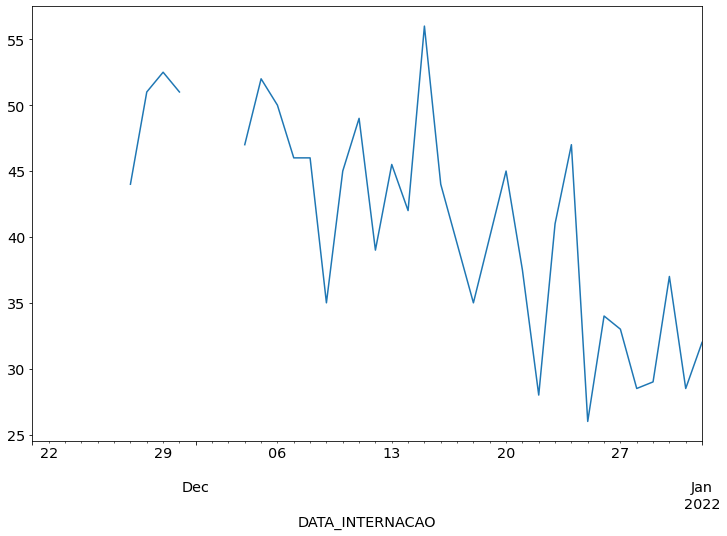

In [284]:
df_saude.PERMANENCIA.loc[df_saude.index<="01/01/2022"].resample('D').median().plot()

In [285]:
# Fazer recorte a partir de fevereiro de 2022 e avaliar o dataset

In [286]:
df_saude = df_saude.loc[df_saude.index >= "02/01/2022"]

In [287]:
df_saude.sample(10)

,SEXO,IDADE,UF,MUNICIPIO,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OBES_IMC,OUT_MORBI,VACINA_COVID,VACINA_INFLUENZA,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,EVOLUCAO,PERMANENCIA
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-05-08,F,60,MG,ITAJUBA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,VACINADO,NAO_VACINADO,0,0,1,VIROSE,CURADO,14
2022-05-26,F,81,SP,IGNORADO,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,OBITO,31
2022-06-23,F,62,SP,OSASCO,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,VACINADO,NAO_VACINADO,0,1,1,COVID19,OBITO,3
2022-03-12,F,65,SP,CAMPINAS,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,VIROSE,CURADO,20
2022-02-11,F,74,PR,GUARAPUAVA,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,COVID19,OBITO,4
2022-02-12,M,70,PR,CURITIBA,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,NAO_VACINADO,0,1,1,VIROSE,OBITO,2
2022-07-05,F,96,RS,LAGOA VERMELHA,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,VACINADO,VACINADO,0,0,1,COVID19,CURADO,9
2022-06-19,M,53,RJ,RESENDE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,NAO_VACINADO,NAO_VACINADO,0,1,0,COVID19,CURADO,3
2022-04-29,F,78,PR,LONDRINA,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,1,VACINADO,NAO_VACINADO,0,0,1,VIROSE,CURADO,7


<AxesSubplot:xlabel='DATA_INTERNACAO'>

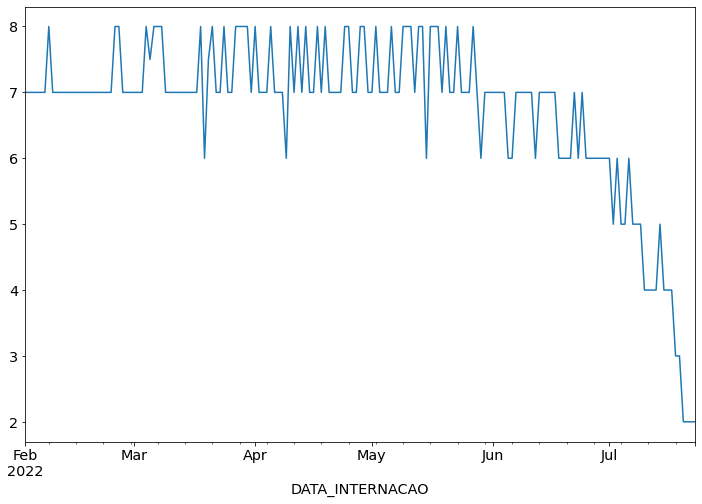

In [288]:
df_saude.PERMANENCIA.resample('D').median().plot()

<AxesSubplot:xlabel='DATA_INTERNACAO'>

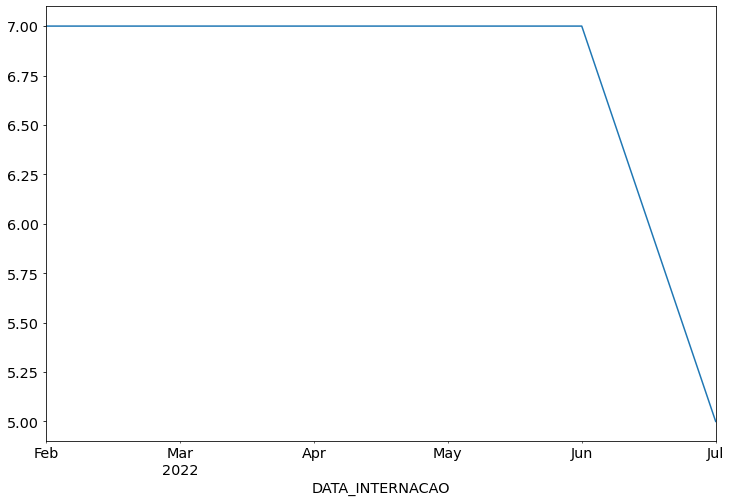

In [289]:
df_saude.PERMANENCIA.resample('M').median().plot()

In [290]:
# Fazer novo recorte até fim de junho de 2022 

In [291]:
df_saude = df_saude.loc[df_saude.index <= "06/30/2022"]

<AxesSubplot:xlabel='DATA_INTERNACAO'>

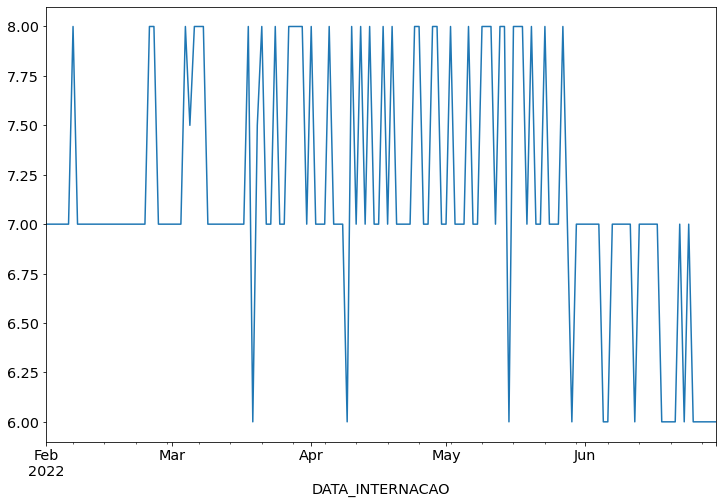

In [292]:
df_saude.PERMANENCIA.resample('D').median().plot()

# FAZENDO A EDA COM OS DADOS CORRIGIDOS

In [293]:
df_saude.PERMANENCIA.describe()

count    108955.000000
mean         10.055977
std           9.239784
min           1.000000
25%           4.000000
50%           7.000000
75%          13.000000
max          60.000000
Name: PERMANENCIA, dtype: float64

Mean: 10.055977238309394
Standard deviation: 9.239741334260279
Minimum: 1
Maximum: 60
Median: 7.0


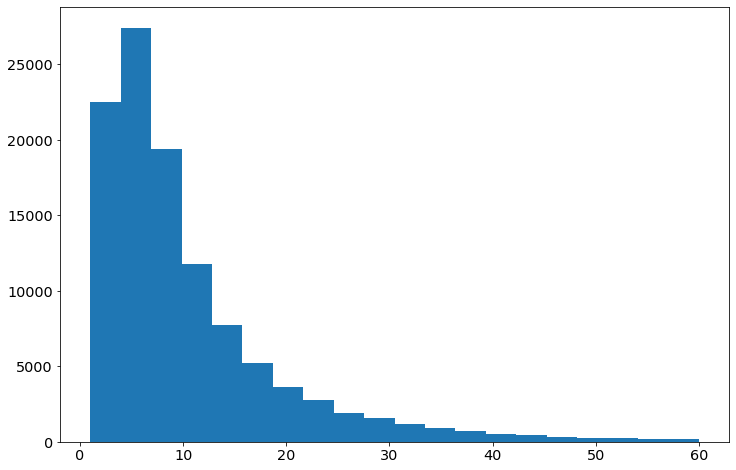

In [294]:
get_statistics(df_saude.PERMANENCIA)

In [295]:
df_saude.info()

df_saude.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108955 entries, 2022-02-02 to 2022-06-27
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   SEXO                 108955 non-null  object
 1   IDADE                108955 non-null  int64 
 2   UF                   108955 non-null  object
 3   MUNICIPIO            108955 non-null  object
 4   GESTANTE             108955 non-null  int64 
 5   INFECCAO_HOSPITAL    108955 non-null  int64 
 6   CONTATO_AVE_SUINO    108955 non-null  int64 
 7   FEBRE                108955 non-null  int64 
 8   TOSSE                108955 non-null  int64 
 9   GARGANTA             108955 non-null  int64 
 10  DISPNEIA             108955 non-null  int64 
 11  DESCONF_RESP         108955 non-null  int64 
 12  SATURACAO            108955 non-null  int64 
 13  DIARREIA             108955 non-null  int64 
 14  VOMITO               108955 non-null  int64 
 15  DOR_ABD           

,SEXO,UF,MUNICIPIO,OBES_IMC,VACINA_COVID,VACINA_INFLUENZA,DIAGNOSTICO,EVOLUCAO
count,108955,108955,108955,108955,108955,108955,108955,108955
unique,2,27,1569,188,2,2,3,2
top,F,SP,SAO PAULO,0,VACINADO,NAO_VACINADO,COVID19,CURADO
freq,55171,34293,7036,108168,89271,97751,63625,75156


In [296]:
df_saude.describe()

,IDADE,GESTANTE,INFECCAO_HOSPITAL,CONTATO_AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,COMORBIDADES,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,ANTIVIRAL,UTI,SUPORT_VENTILATORIO,PERMANENCIA
count,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000,108955.000000
mean,67.138029,0.013519,0.030058,0.008499,0.399798,0.608279,0.140131,0.633684,0.486375,0.580616,0.076004,0.077252,0.062760,0.213951,0.020586,0.021146,0.730705,0.367913,0.011766,0.003148,0.012446,0.033858,0.235070,0.080409,0.081667,0.050498,0.055922,0.049855,0.353724,0.020834,0.310807,0.627149,10.055977
std,19.215289,0.115485,0.170748,0.091797,0.489859,0.488137,0.347125,0.481800,0.499817,0.493461,0.265005,0.266992,0.242532,0.410094,0.141996,0.143873,0.443595,0.482240,0.107833,0.056020,0.110864,0.180864,0.424044,0.271927,0.273858,0.218971,0.229772,0.217647,0.478127,0.142830,0.462826,0.483565,9.239784
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
75%,82.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,13.000000
max,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000


<AxesSubplot:xlabel='PERMANENCIA', ylabel='Density'>

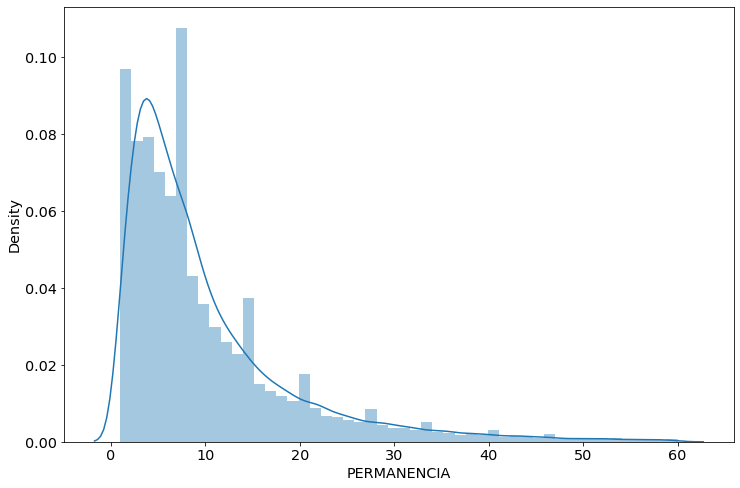

In [297]:
sns.distplot(df_saude['PERMANENCIA'])

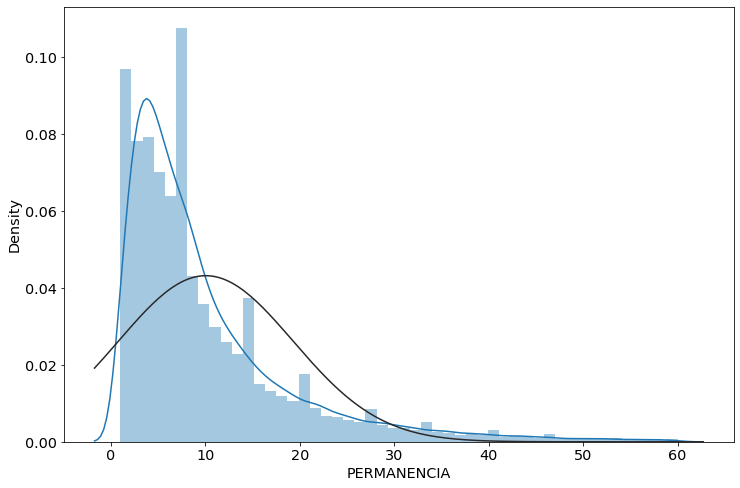

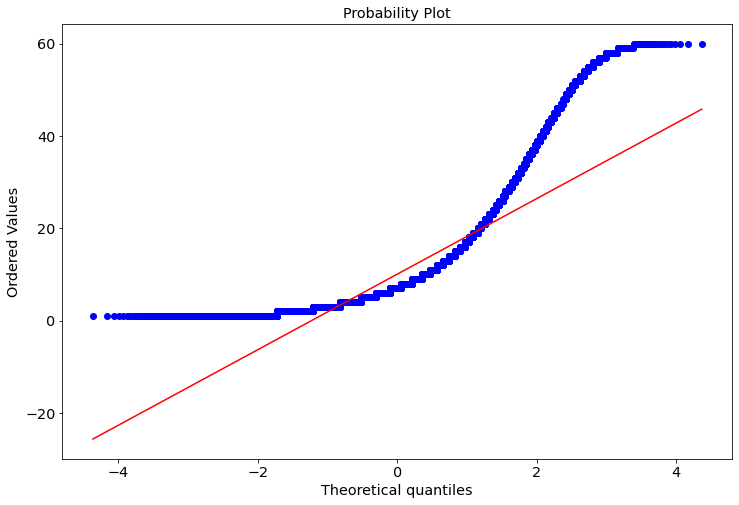

In [298]:
#histogram and normal probability plot
sns.distplot(df_saude['PERMANENCIA'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_saude['PERMANENCIA'], plot=plt)

array([[<AxesSubplot:title={'center':'IDADE'}>,
        <AxesSubplot:title={'center':'GESTANTE'}>,
        <AxesSubplot:title={'center':'INFECCAO_HOSPITAL'}>,
        <AxesSubplot:title={'center':'CONTATO_AVE_SUINO'}>,
        <AxesSubplot:title={'center':'FEBRE'}>,
        <AxesSubplot:title={'center':'TOSSE'}>],
       [<AxesSubplot:title={'center':'GARGANTA'}>,
        <AxesSubplot:title={'center':'DISPNEIA'}>,
        <AxesSubplot:title={'center':'DESCONF_RESP'}>,
        <AxesSubplot:title={'center':'SATURACAO'}>,
        <AxesSubplot:title={'center':'DIARREIA'}>,
        <AxesSubplot:title={'center':'VOMITO'}>],
       [<AxesSubplot:title={'center':'DOR_ABD'}>,
        <AxesSubplot:title={'center':'FADIGA'}>,
        <AxesSubplot:title={'center':'PERD_OLFT'}>,
        <AxesSubplot:title={'center':'PERD_PALA'}>,
        <AxesSubplot:title={'center':'COMORBIDADES'}>,
        <AxesSubplot:title={'center':'CARDIOPATI'}>],
       [<AxesSubplot:title={'center':'HEMATOLOGI'}>,
        <

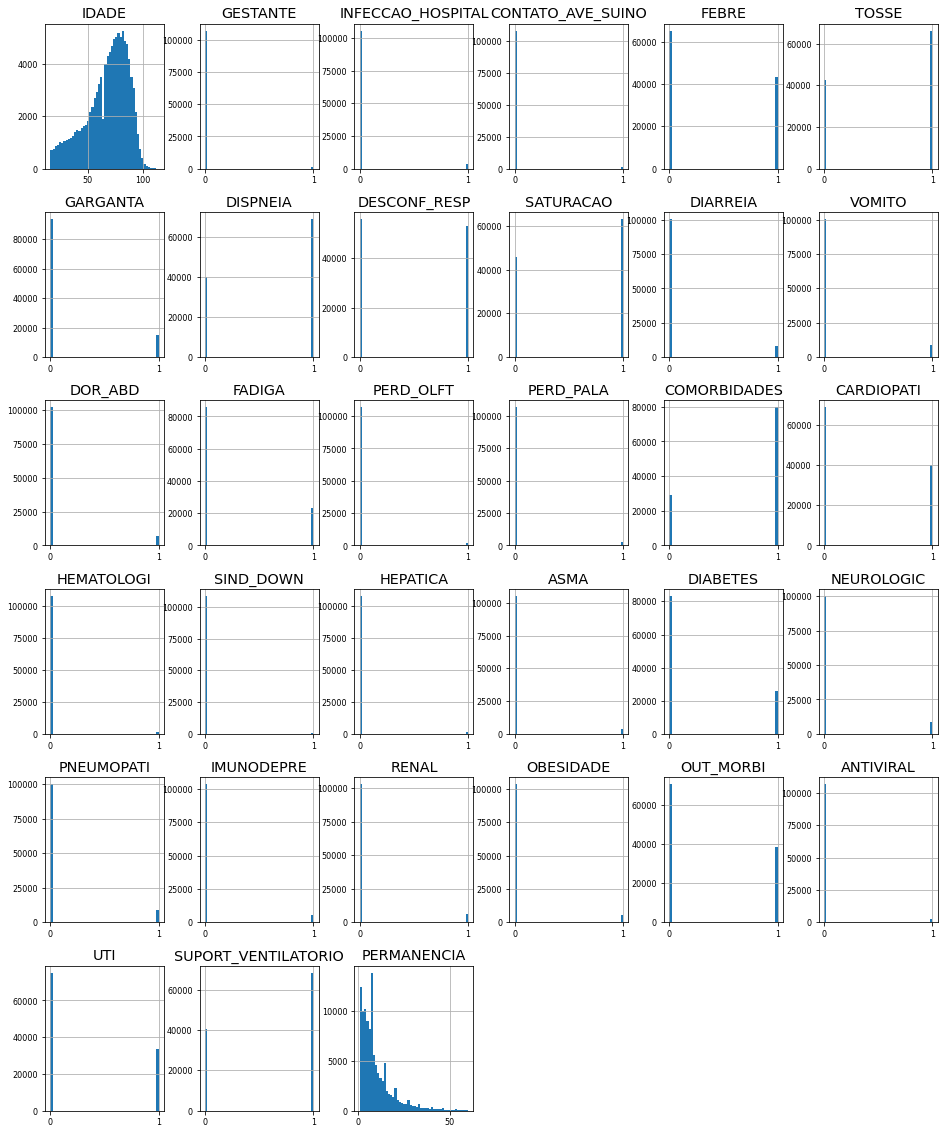

In [299]:
df_saude.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Scatterplot

Text(0.5, 1.0, 'Tempo de Permanência x Idade')

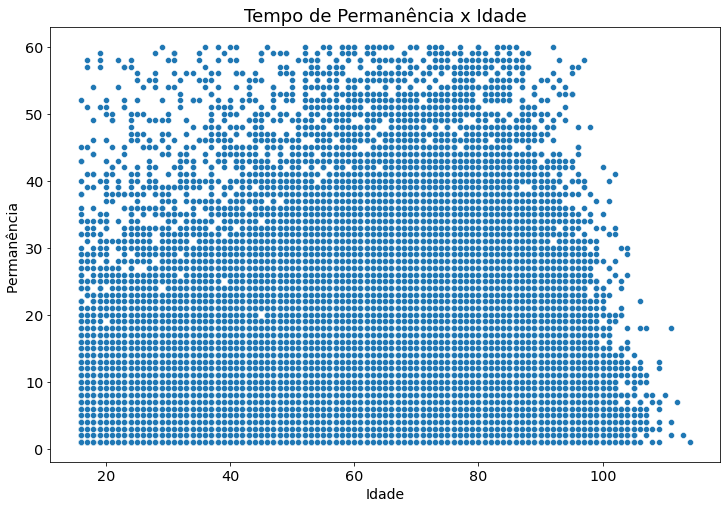

In [300]:
sns.scatterplot(data=df_saude, x="IDADE", y="PERMANENCIA")


plt.ylabel("Permanência ", size=14)
plt.xlabel("Idade", size=14)
plt.title("Tempo de Permanência x Idade", size=18)

## Box plot

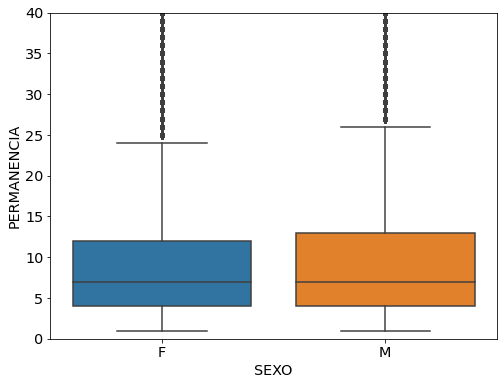

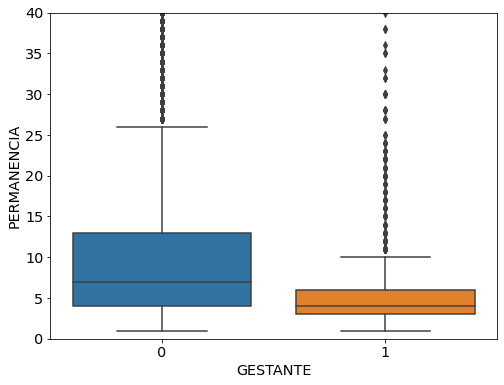

In [301]:
var = 'SEXO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'GESTANTE'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

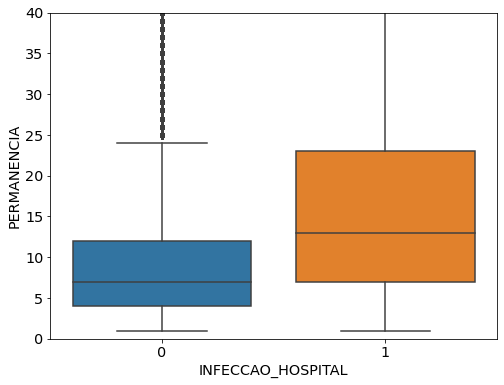

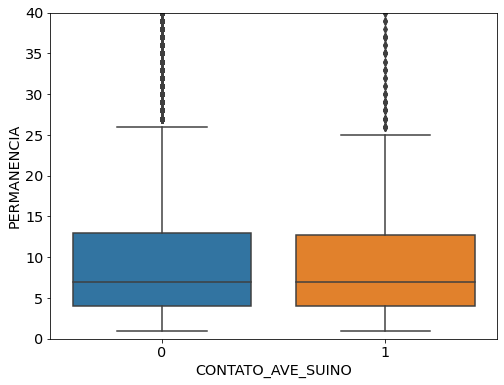

In [302]:
var = 'INFECCAO_HOSPITAL'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'CONTATO_AVE_SUINO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

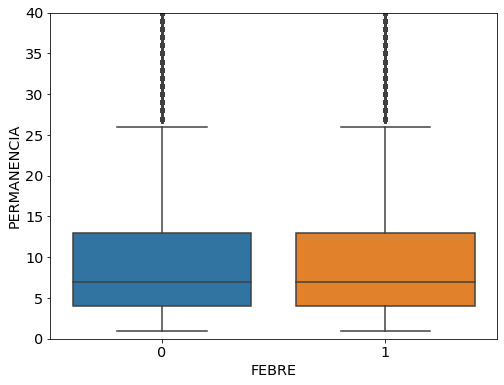

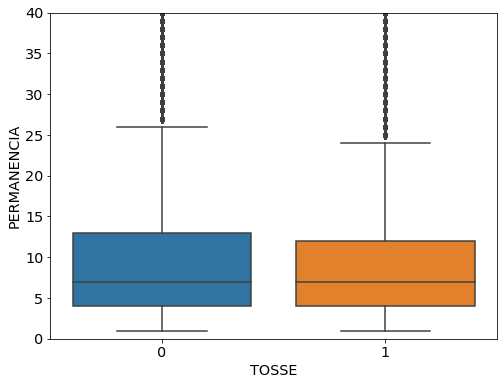

In [303]:
var = 'FEBRE'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'TOSSE'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

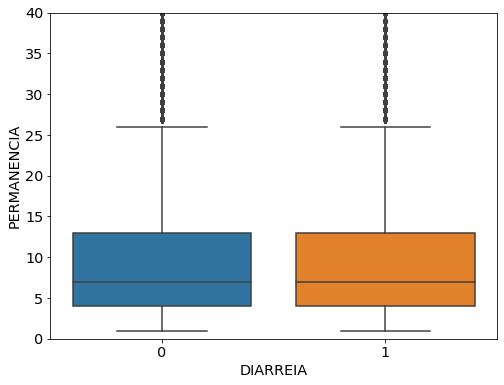

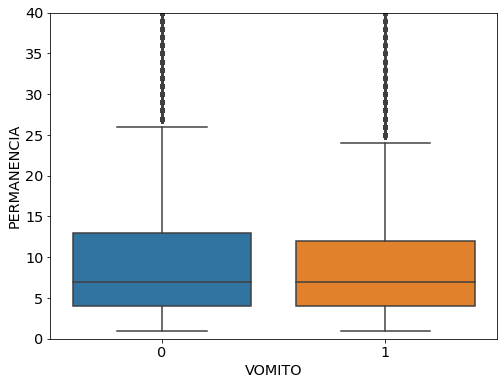

In [304]:
var = 'DIARREIA'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'VOMITO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

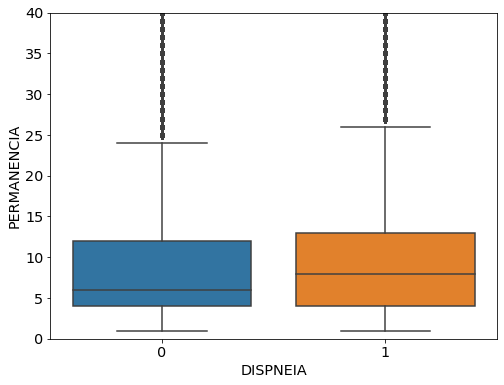

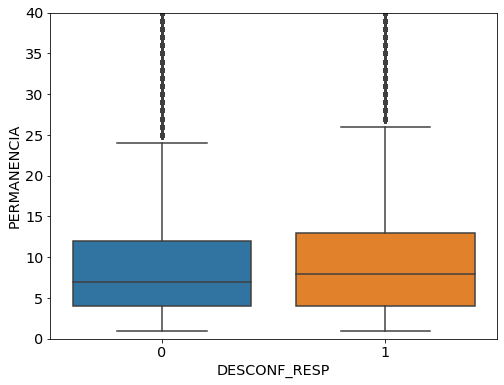

In [305]:
var = 'DISPNEIA'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'DESCONF_RESP'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

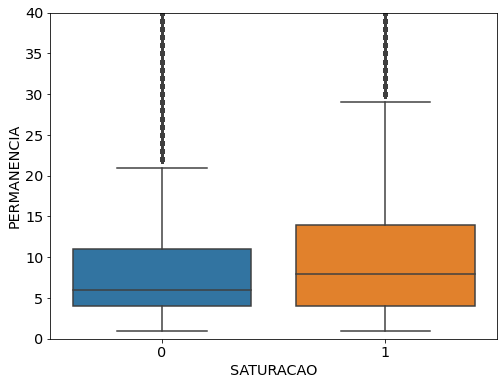

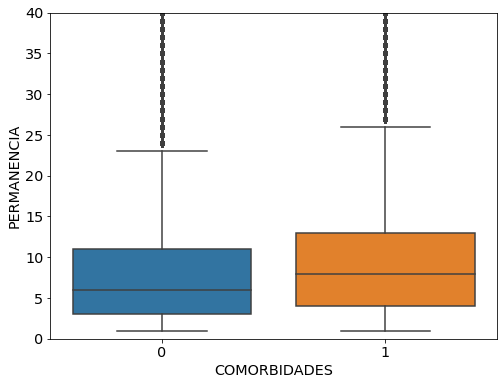

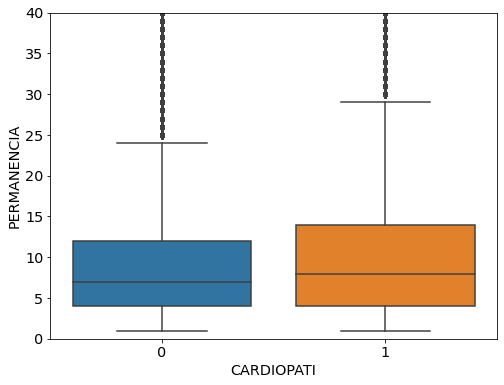

In [306]:
var = 'SATURACAO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'COMORBIDADES'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'CARDIOPATI'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

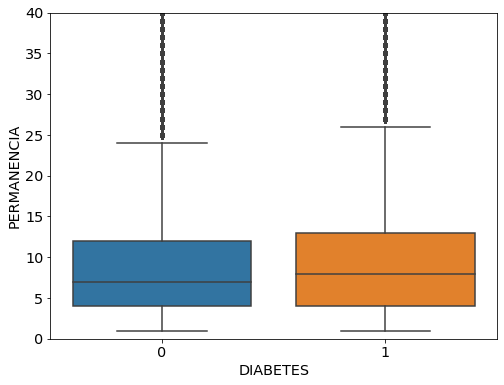

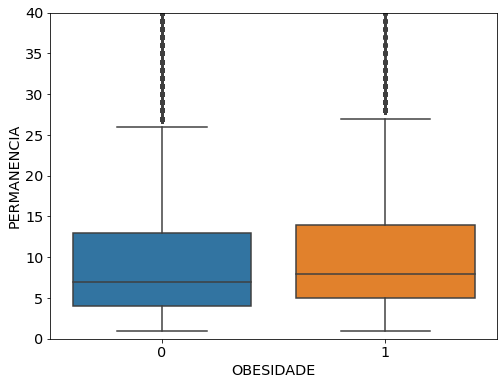

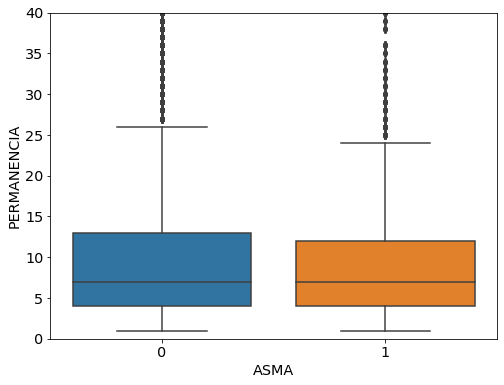

In [307]:
var = 'DIABETES'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'OBESIDADE'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'ASMA'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

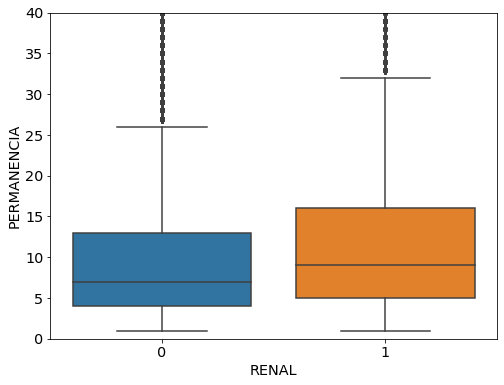

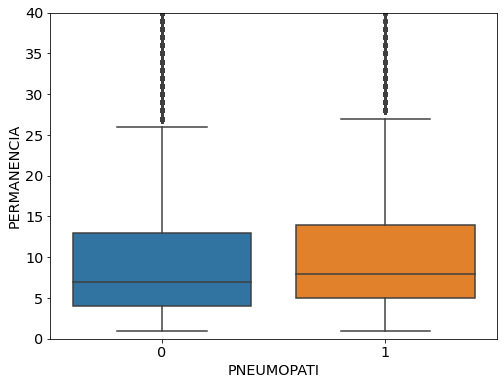

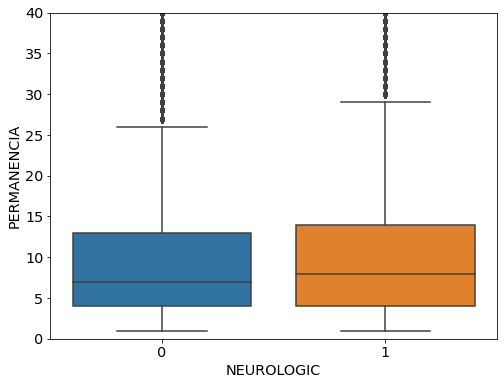

In [308]:
var = 'RENAL'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'PNEUMOPATI'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'NEUROLOGIC'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

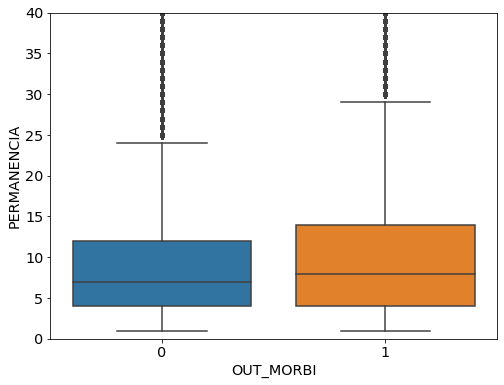

In [309]:
var = 'OUT_MORBI'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

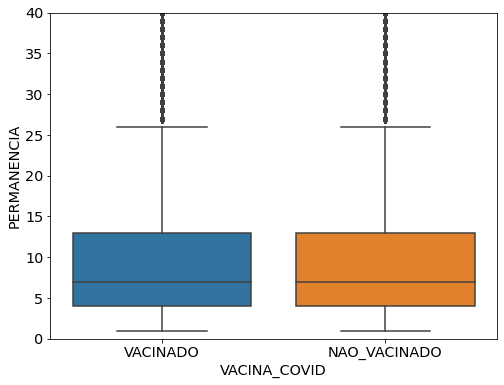

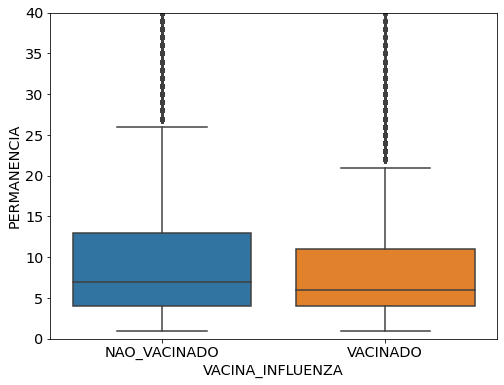

In [310]:
var = 'VACINA_COVID'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'VACINA_INFLUENZA'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

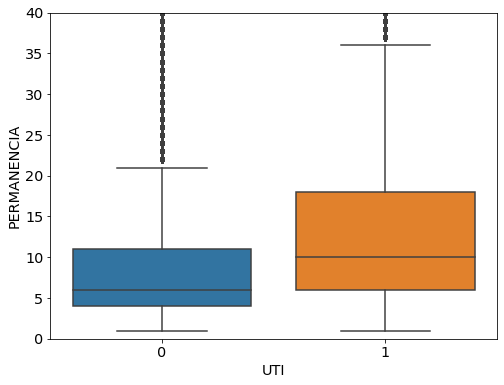

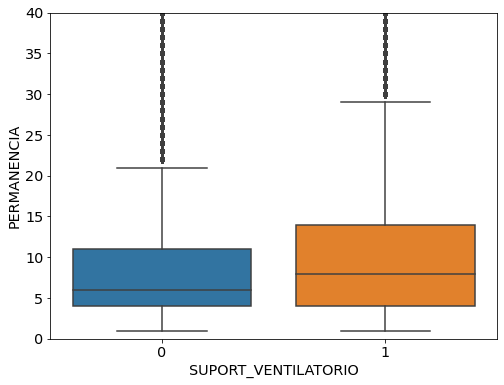

In [311]:
var = 'UTI'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'SUPORT_VENTILATORIO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

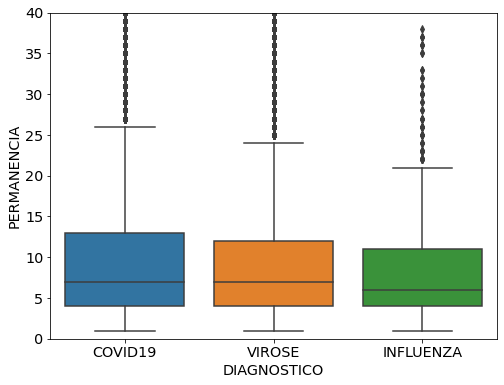

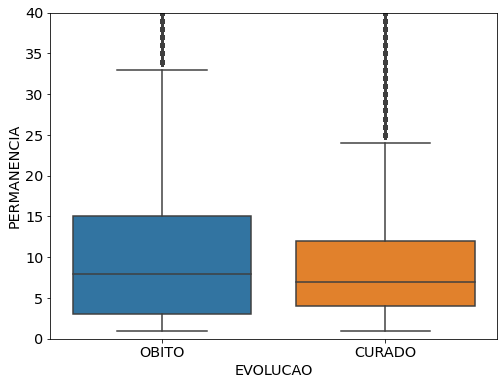

In [312]:
var = 'DIAGNOSTICO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

var = 'EVOLUCAO'
data = pd.concat([df_saude['PERMANENCIA'], df_saude[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="PERMANENCIA", data=data)
fig.axis(ymin=0, ymax=40);

In [313]:
# Podemos aproveitar as featrures: comorbidades, saturação, UTI, suporte ventilatório e o diagnóstico pós exames
# Os sintomas não representam tanto a permanência mas pode esplicar melhor a performance do modelo

In [314]:
# Vacinação Covid19 não há muita diferença dos não vacinados, após ampla adesão, e redução de sintomas e internações

In [315]:
# É Possível observar que óbito, mesmo tendo destaque na EDA, mas não faz sentido utilizá-la.
# Quem morre geralmente passa mais dias, mas pode ter um tempo curto e se trata de um evento futuro. 
# Ou seja um evento futuro e que caracteriza o término da internação não ajudará no nosso problema.

## Entendendo correlações ou não

In [316]:
df_saude.corr()['PERMANENCIA'][:-1]

IDADE                  0.024435
GESTANTE              -0.053987
INFECCAO_HOSPITAL      0.121561
CONTATO_AVE_SUINO     -0.000269
FEBRE                  0.013734
TOSSE                 -0.016100
GARGANTA              -0.039887
DISPNEIA               0.050877
DESCONF_RESP           0.046480
SATURACAO              0.073631
DIARREIA              -0.002169
VOMITO                -0.011110
DOR_ABD               -0.008928
FADIGA                -0.007797
PERD_OLFT             -0.011609
PERD_PALA             -0.013829
COMORBIDADES           0.082606
CARDIOPATI             0.050707
HEMATOLOGI             0.030419
SIND_DOWN              0.012285
HEPATICA               0.018342
ASMA                  -0.012228
DIABETES               0.036064
NEUROLOGIC             0.027629
PNEUMOPATI             0.031854
IMUNODEPRE             0.059567
RENAL                  0.051834
OBESIDADE              0.029976
OUT_MORBI              0.049516
ANTIVIRAL              0.001982
UTI                    0.237889
SUPORT_V

In [317]:
# Vimos aqui que a correlação não ajuda, não sendo possível usar o modelo linear

# Modelagem Ensembles

## Importando Bibliotecas

In [318]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [319]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix # create confusion matrix
from sklearn.metrics import plot_confusion_matrix # creates a confusion matrix
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during

In [320]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [321]:
# Balanceamento do Dataset

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

## Escolhendo as features importantes para o Modelo

In [322]:
df_modelo = df_saude.drop(['DOR_ABD', 'PERD_OLFT', 'PERD_PALA', 'HEMATOLOGI', 'SIND_DOWN', 
                           'ANTIVIRAL', 'CONTATO_AVE_SUINO', 'ASMA', 'OBES_IMC',
                           'EVOLUCAO', 'UF', 'MUNICIPIO', 'SEXO', 'VACINA_COVID'], axis=1)

In [323]:
df_modelo.head()

,IDADE,GESTANTE,INFECCAO_HOSPITAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,FADIGA,COMORBIDADES,CARDIOPATI,HEPATICA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,VACINA_INFLUENZA,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO,PERMANENCIA
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-02,86,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,NAO_VACINADO,0,1,COVID19,8
2022-02-01,71,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,0,1,COVID19,2
2022-02-02,79,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,NAO_VACINADO,0,1,COVID19,7
2022-02-03,63,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,NAO_VACINADO,1,0,COVID19,8
2022-02-03,46,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,NAO_VACINADO,0,1,COVID19,1


## Feature Engineering: One Hot Encoding

In [324]:
ohe = OneHotEncoder()

ohe.fit(df_modelo[['DIAGNOSTICO', 'VACINA_INFLUENZA']])

print(ohe.transform(df_modelo[['DIAGNOSTICO', 'VACINA_INFLUENZA']]).toarray()[:1])

[[1. 0. 0. 1. 0.]]


In [325]:
ohe.get_feature_names_out()

array(['DIAGNOSTICO_COVID19', 'DIAGNOSTICO_INFLUENZA',
       'DIAGNOSTICO_VIROSE', 'VACINA_INFLUENZA_NAO_VACINADO',
       'VACINA_INFLUENZA_VACINADO'], dtype=object)

In [326]:
ohe_columns = ohe.get_feature_names_out()
df_modelo[ohe_columns] = ohe.transform(df_modelo[['DIAGNOSTICO', 'VACINA_INFLUENZA']]).toarray()

In [327]:
df_modelo = df_modelo.drop(['DIAGNOSTICO', 'VACINA_INFLUENZA'], axis=1)

## Feature Engineering: Q Cut (INTERNAÇÃO)

In [328]:
## Escolhendo o tempo de internação, nova target, em intervalos de tempo
## Com base no 1º quartil, 4 dias, tendo menor tempo como razoável, e os demais com maior tempo como críticos

In [329]:
n_df = df_modelo

n_df['INTERNAÇÃO'] = pd.cut(n_df.PERMANENCIA, bins=[-np.inf, 4, np.inf], labels=['razoavel', 'critico'])
n_df['INTERNAÇÃO'].value_counts()

critico     76265
razoavel    32690
Name: INTERNAÇÃO, dtype: int64

In [330]:
# Transformando String em número para o modelo a ser usado

In [331]:
df_modelo.replace('razoavel', 0.0 ,inplace=True)
df_modelo.replace('critico', 1.0 ,inplace=True)

## Remover a target antiga: PERMANENCIA

In [332]:
df_model = df_modelo.drop(['PERMANENCIA'], axis=1)

In [333]:
df_model.sample(10)

,IDADE,GESTANTE,INFECCAO_HOSPITAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,FADIGA,COMORBIDADES,CARDIOPATI,HEPATICA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO_COVID19,DIAGNOSTICO_INFLUENZA,DIAGNOSTICO_VIROSE,VACINA_INFLUENZA_NAO_VACINADO,VACINA_INFLUENZA_VACINADO,INTERNAÇÃO
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-28,16,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.0,0.0
2022-05-04,72,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0
2022-05-01,41,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0.0,0.0,1.0,1.0,0.0,1.0
2022-02-02,62,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,1.0
2022-02-12,56,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1.0,0.0,0.0,1.0,0.0,1.0
2022-05-08,66,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,0.0,1.0
2022-04-05,82,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,1.0,0.0,0.0
2022-04-23,67,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0.0,0.0,1.0,1.0,0.0,0.0
2022-04-11,66,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0


In [334]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108955 entries, 2022-02-02 to 2022-06-27
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   IDADE                          108955 non-null  int64   
 1   GESTANTE                       108955 non-null  int64   
 2   INFECCAO_HOSPITAL              108955 non-null  int64   
 3   FEBRE                          108955 non-null  int64   
 4   TOSSE                          108955 non-null  int64   
 5   GARGANTA                       108955 non-null  int64   
 6   DISPNEIA                       108955 non-null  int64   
 7   DESCONF_RESP                   108955 non-null  int64   
 8   SATURACAO                      108955 non-null  int64   
 9   DIARREIA                       108955 non-null  int64   
 10  VOMITO                         108955 non-null  int64   
 11  FADIGA                         108955 non-null  int64   
 12  

## Construção: Separa treino e teste

In [335]:
y=df_model.INTERNAÇÃO
y.head()

DATA_INTERNACAO
2022-02-02    1.0
2022-02-01    0.0
2022-02-02    1.0
2022-02-03    1.0
2022-02-03    0.0
Name: INTERNAÇÃO, dtype: category
Categories (2, float64): [0.0 < 1.0]

In [336]:
X=df_model.drop(columns=['INTERNAÇÃO'])
X.head()

,IDADE,GESTANTE,INFECCAO_HOSPITAL,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESCONF_RESP,SATURACAO,DIARREIA,VOMITO,FADIGA,COMORBIDADES,CARDIOPATI,HEPATICA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,OUT_MORBI,UTI,SUPORT_VENTILATORIO,DIAGNOSTICO_COVID19,DIAGNOSTICO_INFLUENZA,DIAGNOSTICO_VIROSE,VACINA_INFLUENZA_NAO_VACINADO,VACINA_INFLUENZA_VACINADO
DATA_INTERNACAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-02-02,86,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1.0,0.0,0.0,1.0,0.0
2022-02-01,71,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0
2022-02-02,79,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0
2022-02-03,63,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,1.0,0.0,0.0,1.0,0.0
2022-02-03,46,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0


In [337]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [338]:
y_train.value_counts(normalize=True)

1.0    0.699533
0.0    0.300467
Name: INTERNAÇÃO, dtype: float64

In [339]:
y_test.value_counts(normalize=True)

1.0    0.700982
0.0    0.299018
Name: INTERNAÇÃO, dtype: float64

In [340]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
                
#sns.barplot(ax=ax1, x=y_train['INTERNAÇÃO'].value_counts().index , y=y_train.value_counts()).set_title('Treino');

                
#sns.barplot(ax=ax2, x=y_test['INTERNAÇÃO'].value_counts().index , y=y_test.value_counts()).set_title('Teste');

# 1.1. Bagged Decision Trees (Árvores de decisão ensacadas)

## Função para Medir os Resultados ou Métricas

In [341]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    plot_roc_curve(model, X_train, y_train)
    plt.show()

    print("\n************************************************")
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    plot_roc_curve(model, X_test, y_test)
    plt.show()

## Realiando e Avaliando o Modelo

Wall time: 3.42 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[20065  2851]
 [ 2245 51107]]
ACCURACY SCORE:
0.9332
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.899372      0.947163  0.933183      0.923268      0.932803
recall         0.875589      0.957921  0.933183      0.916755      0.933183
f1-score       0.887321      0.952511  0.933183      0.919916      0.932924
support    22916.000000  53352.000000  0.933183  76268.000000  76268.000000


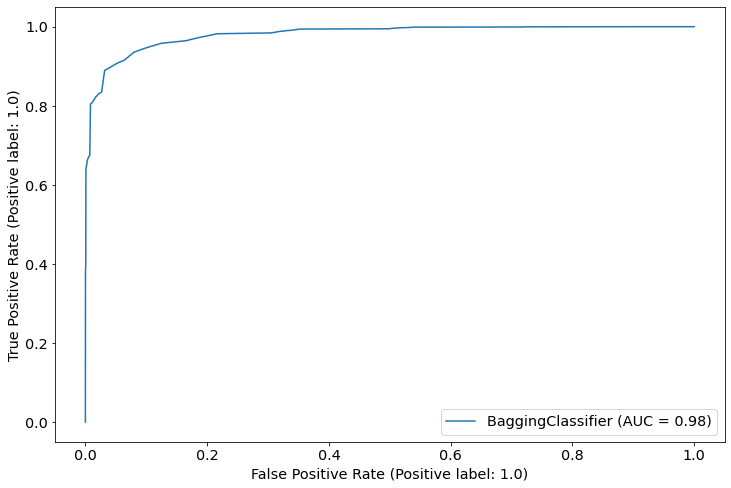


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 3143  6631]
 [ 5437 17476]]
ACCURACY SCORE:
0.6308
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.366317      0.724935  0.630801      0.545626      0.617702
recall        0.321567      0.762711  0.630801      0.542139      0.630801
f1-score      0.342487      0.743343  0.630801      0.542915      0.623480
support    9774.000000  22913.000000  0.630801  32687.000000  32687.000000


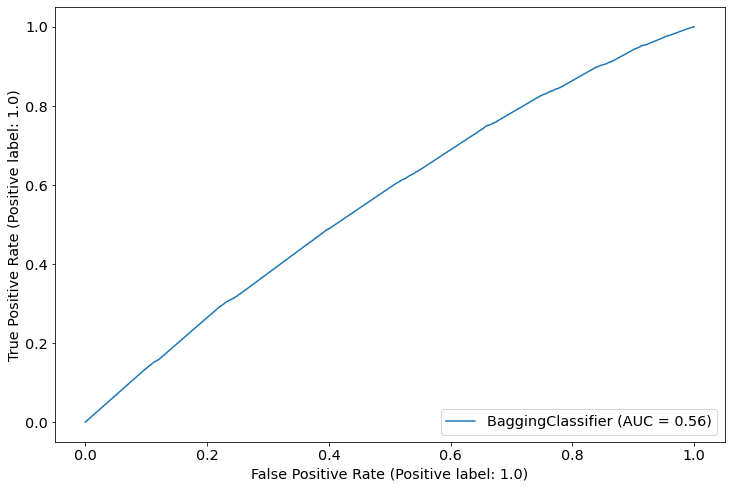

In [342]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, random_state=42,)
%time bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

### Armazenando os Resultados

In [343]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

# 1.2. Random Forest (Floresta aleatória)


## Fazendo Predições e Avaliando os Resultados

Wall time: 11.6 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[20257  2659]
 [ 1459 51893]]
ACCURACY SCORE:
0.9460
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.932815      0.951258  0.946006      0.942036      0.945716
recall         0.883968      0.972653  0.946006      0.928310      0.946006
f1-score       0.907734      0.961836  0.946006      0.934785      0.945581
support    22916.000000  53352.000000  0.946006  76268.000000  76268.000000


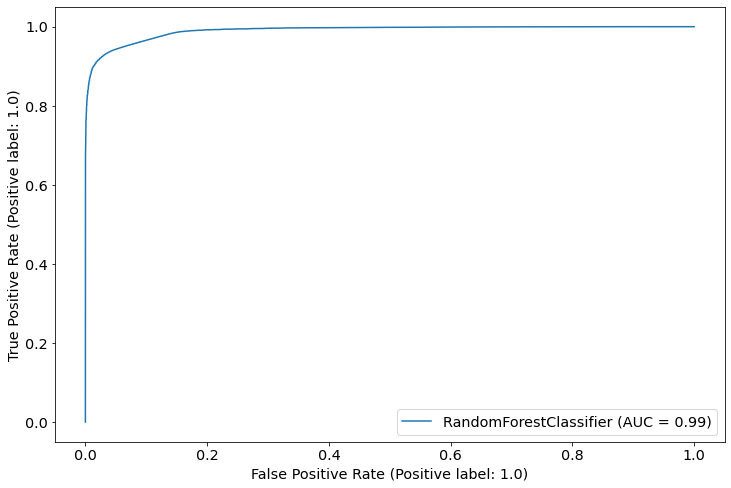


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 2635  7139]
 [ 4085 18828]]
ACCURACY SCORE:
0.6566
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.392113      0.725074  0.656622      0.558594      0.625513
recall        0.269593      0.821717  0.656622      0.545655      0.656622
f1-score      0.319510      0.770376  0.656622      0.544943      0.635559
support    9774.000000  22913.000000  0.656622  32687.000000  32687.000000


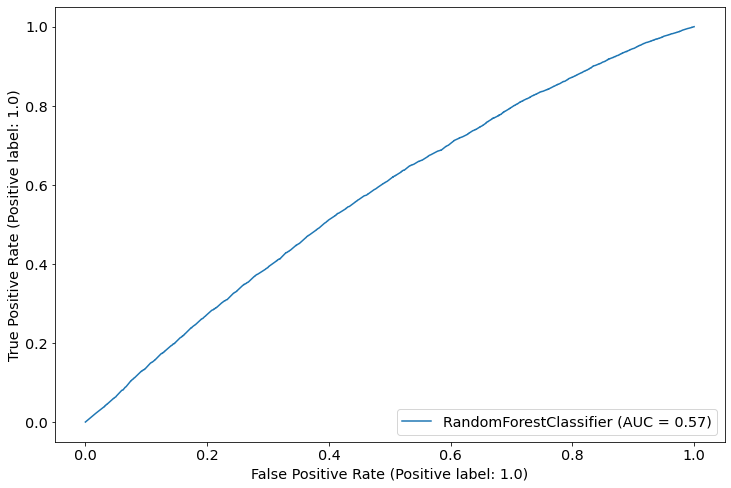

In [344]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
%time rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

## Armazenando os Resultados

In [345]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

# 1.3. Extra Trees (Árvores Extras)

## Fazendo Predições e Avaliando os Resultados

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[21798  1118]
 [ 2998 50354]]
ACCURACY SCORE:
0.9460
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.879093      0.978279  0.946032      0.928686      0.948477
recall         0.951213      0.943807  0.946032      0.947510      0.946032
f1-score       0.913732      0.960734  0.946032      0.937233      0.946612
support    22916.000000  53352.000000  0.946032  76268.000000  76268.000000


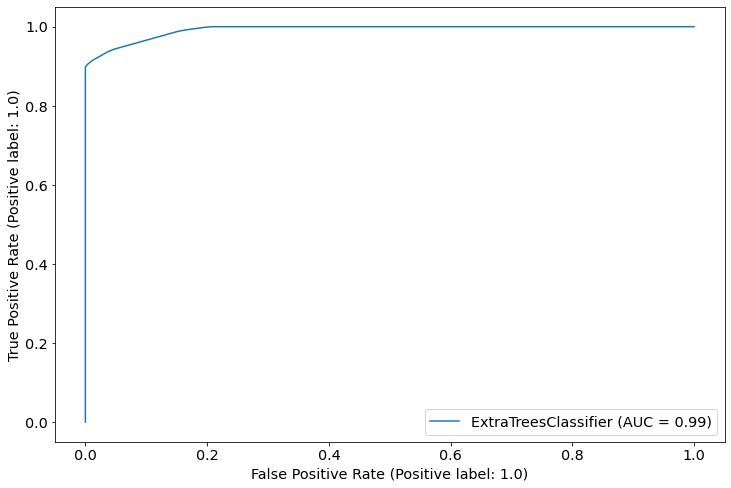


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 3150  6624]
 [ 5391 17522]]
ACCURACY SCORE:
0.6324
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.368809      0.725669  0.632423      0.547239      0.618961
recall        0.322284      0.764719  0.632423      0.543501      0.632423
f1-score      0.343980      0.744682  0.632423      0.544331      0.624865
support    9774.000000  22913.000000  0.632423  32687.000000  32687.000000


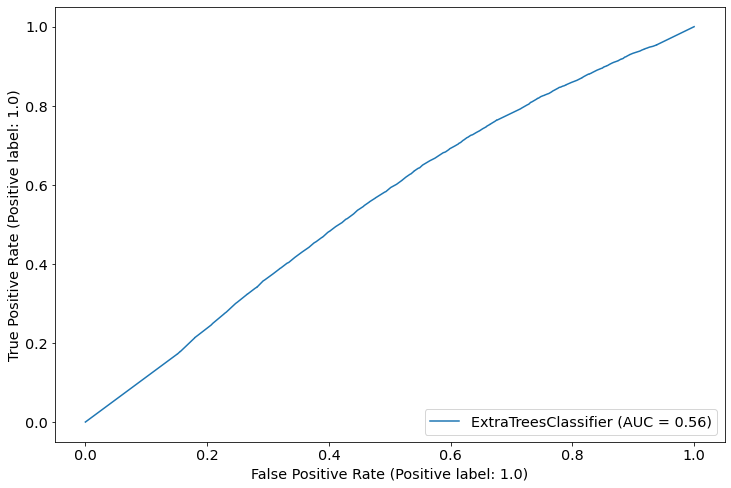

In [346]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

### Armazenando os Resultados

In [347]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

# 2.1. AdaBoost

## Fazendo Predições e Avaliando os Resultados

Wall time: 1.59 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 1254 21662]
 [  795 52557]]
ACCURACY SCORE:
0.7056
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.612006      0.708134  0.705551      0.660070      0.679251
recall         0.054722      0.985099  0.705551      0.519910      0.705551
f1-score       0.100461      0.823965  0.705551      0.462213      0.606576
support    22916.000000  53352.000000  0.705551  76268.000000  76268.000000


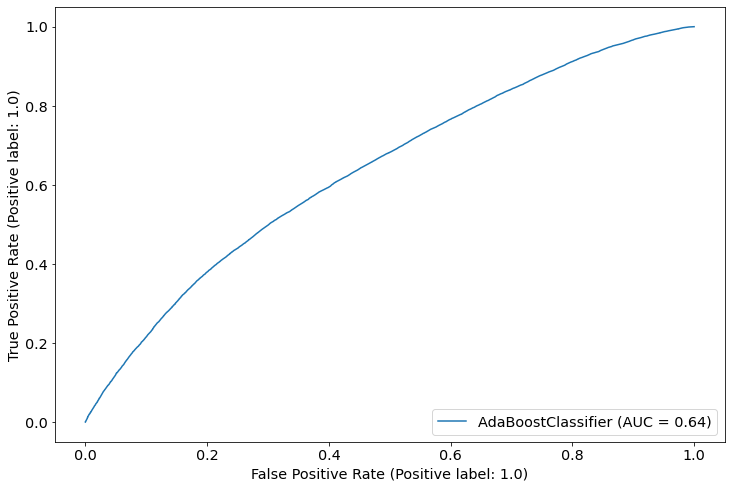


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[  507  9267]
 [  347 22566]]
ACCURACY SCORE:
0.7059
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.593677      0.708887  0.705877      0.651282      0.674437
recall        0.051872      0.984856  0.705877      0.518364      0.705877
f1-score      0.095408      0.824389  0.705877      0.459899      0.606411
support    9774.000000  22913.000000  0.705877  32687.000000  32687.000000


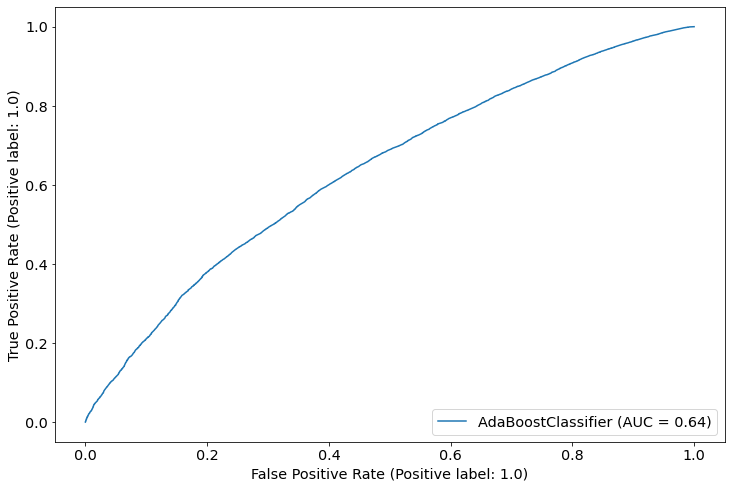

In [348]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30, learning_rate=1,)
%time ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

### Armazenando os Resultados

In [349]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

# 2.2. Gradient Boosting

## Fazendo Predições e Avaliando os Resultados

Wall time: 7.83 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 1976 20940]
 [ 1280 52072]]
ACCURACY SCORE:
0.7087
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.606880      0.713198  0.708659      0.660039      0.681253
recall         0.086228      0.976008  0.708659      0.531118      0.708659
f1-score       0.151001      0.824159  0.708659      0.487580      0.621897
support    22916.000000  53352.000000  0.708659  76268.000000  76268.000000


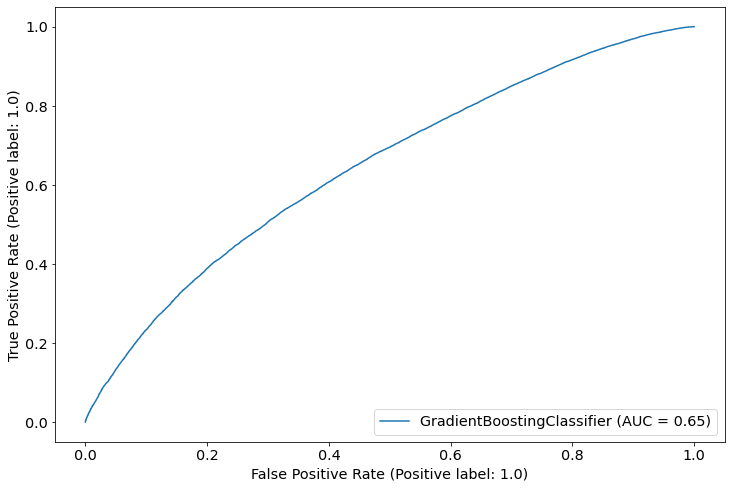


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[  816  8958]
 [  579 22334]]
ACCURACY SCORE:
0.7082
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.584946      0.713729  0.708233      0.649337      0.675220
recall        0.083487      0.974731  0.708233      0.529109      0.708233
f1-score      0.146119      0.824057  0.708233      0.485088      0.621341
support    9774.000000  22913.000000  0.708233  32687.000000  32687.000000


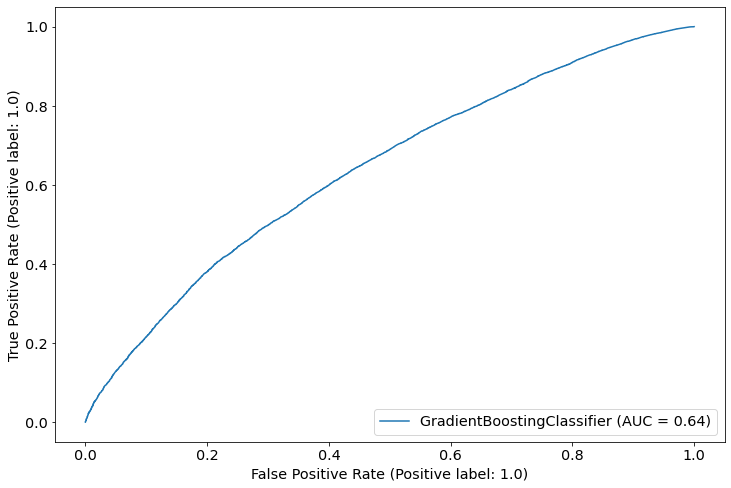

In [350]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42,)
%time grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

### Armazenando os Resultados

In [351]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

# 2.3 XGBoost

## Fazendo Predições e Avaliando os Resultados

Wall time: 744 ms
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 3430 19486]
 [ 1510 51842]]
ACCURACY SCORE:
0.7247
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.694332      0.726811  0.724708      0.710572      0.717052
recall         0.149677      0.971697  0.724708      0.560687      0.724708
f1-score       0.246267      0.831601  0.724708      0.538934      0.655727
support    22916.000000  53352.000000  0.724708  76268.000000  76268.000000


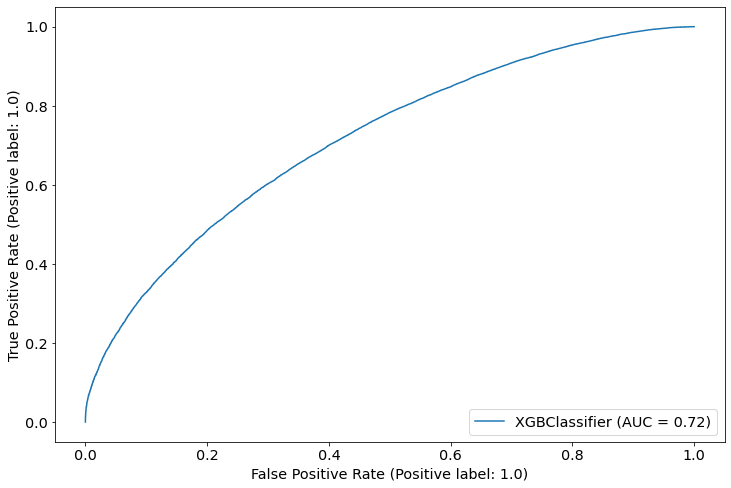


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 1058  8716]
 [  952 21961]]
ACCURACY SCORE:
0.7042
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.526368      0.715878  0.704225      0.621123      0.659211
recall        0.108246      0.958452  0.704225      0.533349      0.704225
f1-score      0.179566      0.819593  0.704225      0.499579      0.628213
support    9774.000000  22913.000000  0.704225  32687.000000  32687.000000


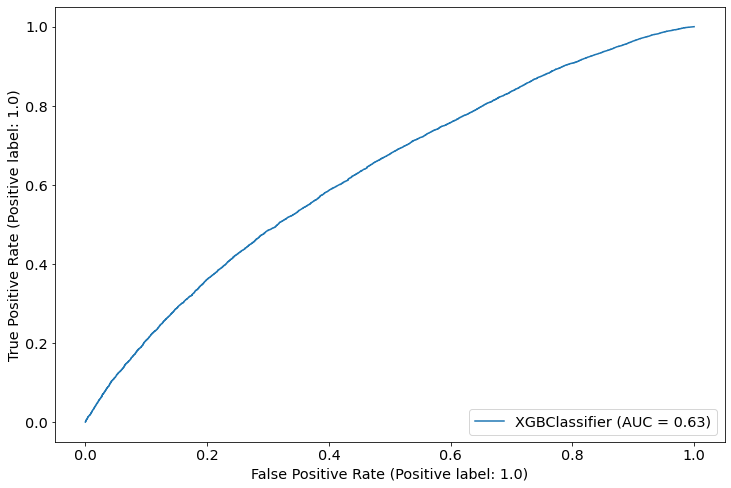

In [352]:
import xgboost as xgb 

xgboost_clf = xgb.XGBClassifier(tree_method="hist")
%time xgboost_clf.fit(X_train, y_train)
evaluate(xgboost_clf, X_train, X_test, y_train, y_test)

### Armazenando os Resultados

In [353]:
scores['XGBoost'] = {
        'Train': accuracy_score(y_train, xgboost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgboost_clf.predict(X_test)),
    }

# Comparação entre todos os modelos

<AxesSubplot:>

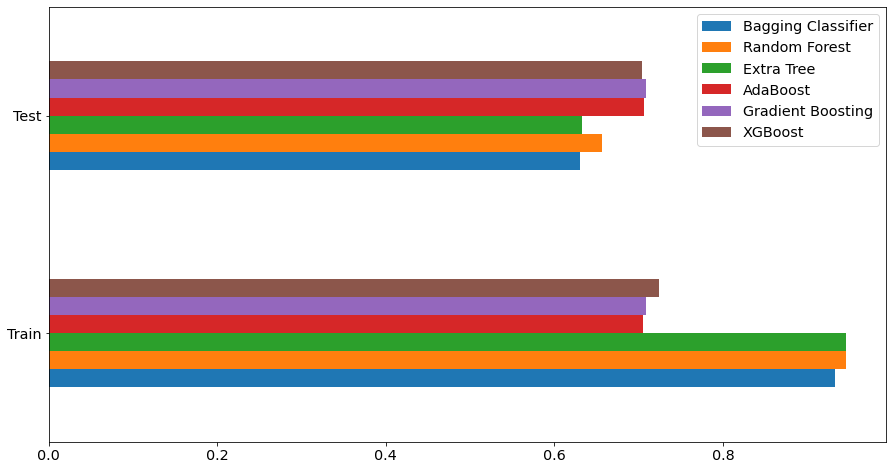

In [354]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# Balanceamento da Random Forest

## Oversampling

In [355]:
print('Original dataset shape %s' %Counter(y_train))

rov = RandomOverSampler(random_state=42)
X_rov,y_rov = rov.fit_resample(X_train,y_train) # Só vou modificar os dados de treino

print('Resampled dataset shape %s' %Counter(y_rov))

Original dataset shape Counter({1.0: 53352, 0.0: 22916})
Resampled dataset shape Counter({1.0: 53352, 0.0: 53352})


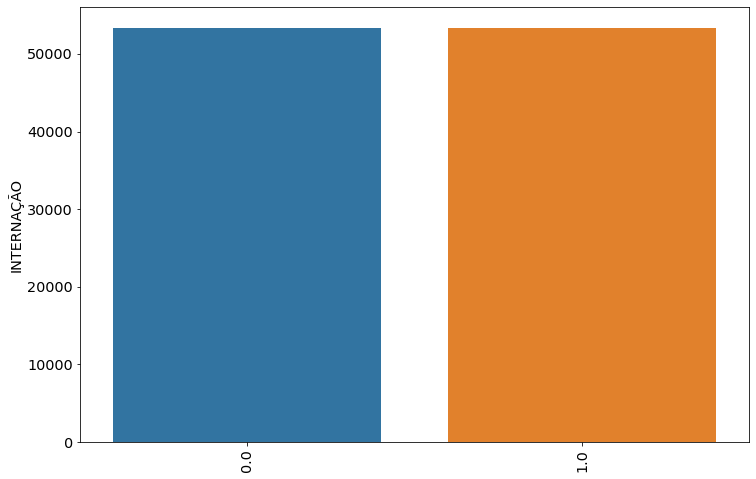

In [356]:
sns.barplot(x=y_rov.value_counts().index ,y = y_rov.value_counts())
plt.xticks(rotation=90);

Wall time: 13.4 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[52202  1150]
 [ 3822 49530]]
ACCURACY SCORE:
0.9534
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.931779      0.977309  0.953404       0.954544       0.954544
recall         0.978445      0.928363  0.953404       0.953404       0.953404
f1-score       0.954542      0.952207  0.953404       0.953375       0.953375
support    53352.000000  53352.000000  0.953404  106704.000000  106704.000000


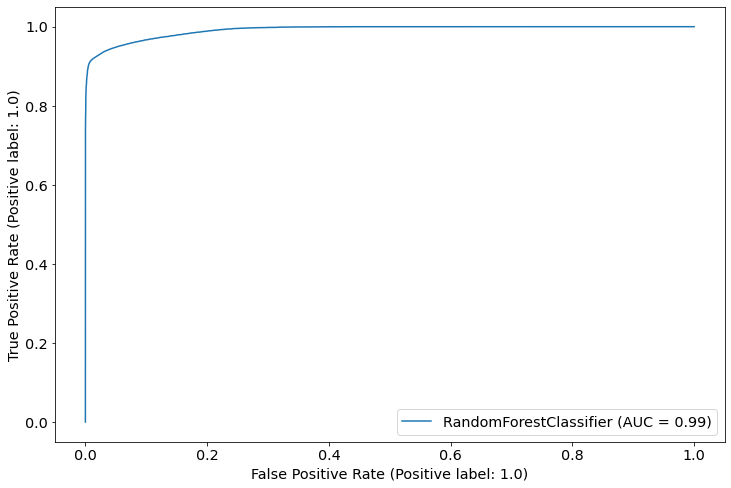


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 3451  6323]
 [ 5870 17043]]
ACCURACY SCORE:
0.6270
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.370239      0.729393  0.626977      0.549816      0.622000
recall        0.353080      0.743814  0.626977      0.548447      0.626977
f1-score      0.361456      0.736533  0.626977      0.548994      0.624378
support    9774.000000  22913.000000  0.626977  32687.000000  32687.000000


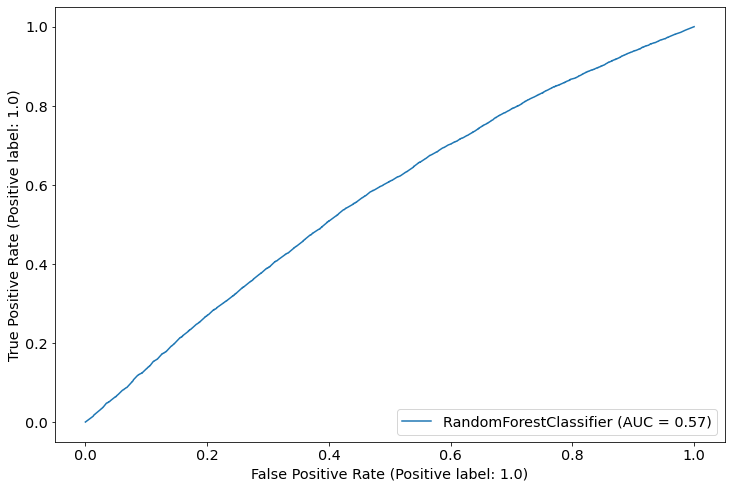

In [357]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
%time rf_clf.fit(X_rov, y_rov)
evaluate(rf_clf, X_rov, X_test, y_rov, y_test)

## Undersampling

In [358]:
print('Original dataset shape %s' %Counter(y_train))

rus = RandomUnderSampler(random_state=42)
X_rus,y_rus = rus.fit_resample(X_train,y_train) 

print('Resampled dataset shape %s' %Counter(y_rus))

Original dataset shape Counter({1.0: 53352, 0.0: 22916})
Resampled dataset shape Counter({0.0: 22916, 1.0: 22916})


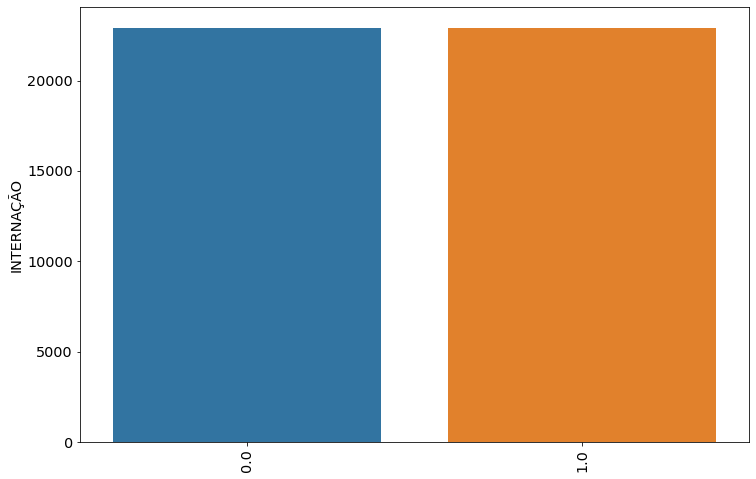

In [359]:
sns.barplot(x=y_rus.value_counts().index ,y = y_rus.value_counts())
plt.xticks(rotation=90);

Wall time: 5.62 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[22008   908]
 [ 1147 21769]]
ACCURACY SCORE:
0.9552
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.950464      0.959959  0.955162      0.955212      0.955212
recall         0.960377      0.949948  0.955162      0.955162      0.955162
f1-score       0.955395      0.954927  0.955162      0.955161      0.955161
support    22916.000000  22916.000000  0.955162  45832.000000  45832.000000


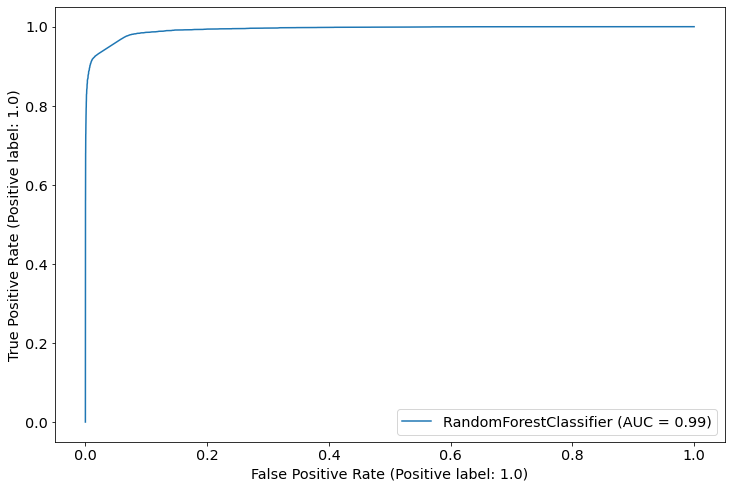


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 5419  4355]
 [ 9851 13062]]
ACCURACY SCORE:
0.5654
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.354879      0.749957  0.565393      0.552418      0.631821
recall        0.554430      0.570069  0.565393      0.562250      0.565393
f1-score      0.432758      0.647756  0.565393      0.540257      0.583468
support    9774.000000  22913.000000  0.565393  32687.000000  32687.000000


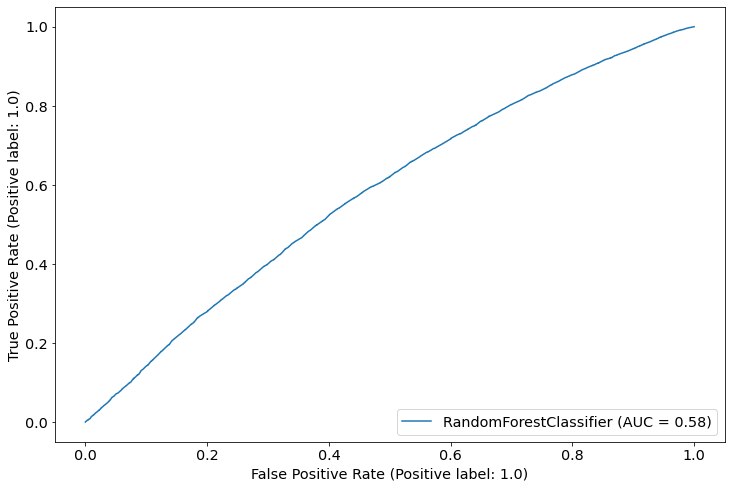

In [360]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
%time rf_clf.fit(X_rus, y_rus)
evaluate(rf_clf, X_rus, X_test, y_rus, y_test)

## SMOTE

In [361]:
smote = SMOTE(random_state=42)
X_sm,y_sm = smote.fit_resample(X_train,y_train)

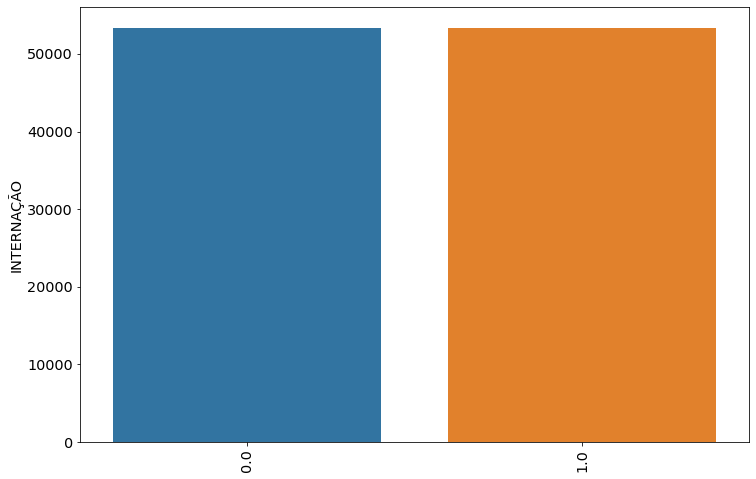

In [362]:
sns.barplot(x=y_sm.value_counts().index ,y = y_sm.value_counts())
plt.xticks(rotation=90);

Wall time: 14.1 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[51619  1733]
 [ 4615 48737]]
ACCURACY SCORE:
0.9405
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.917932      0.965663  0.940508       0.941797       0.941797
recall         0.967518      0.913499  0.940508       0.940508       0.940508
f1-score       0.942073      0.938857  0.940508       0.940465       0.940465
support    53352.000000  53352.000000  0.940508  106704.000000  106704.000000


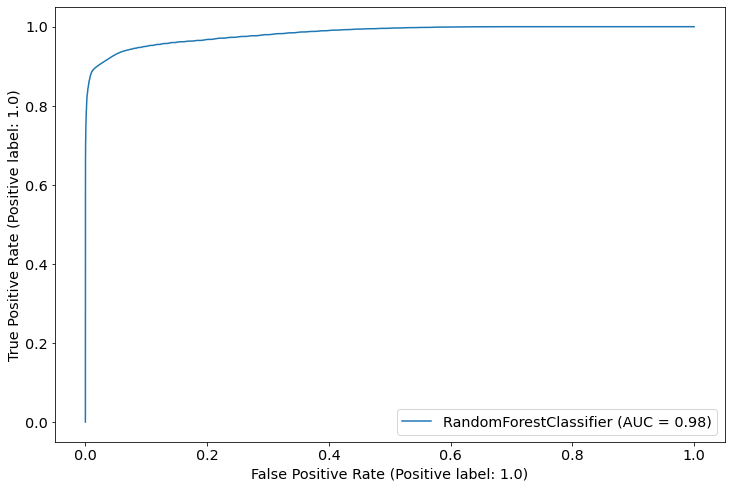


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 3852  5922]
 [ 6596 16317]]
ACCURACY SCORE:
0.6170
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.368683      0.733711  0.617034      0.551197      0.624561
recall        0.394107      0.712128  0.617034      0.553118      0.617034
f1-score      0.380971      0.722759  0.617034      0.551865      0.620558
support    9774.000000  22913.000000  0.617034  32687.000000  32687.000000


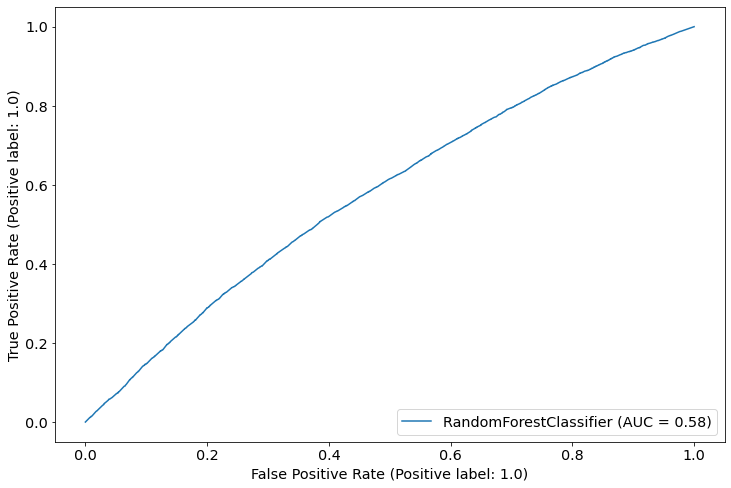

In [363]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
%time rf_clf.fit(X_sm, y_sm)
evaluate(rf_clf, X_sm, X_test, y_sm, y_test)

## ADASYN

In [364]:
adasyn = ADASYN(random_state=42)

X_ada, y_ada = adasyn.fit_resample(X_train,y_train)

Wall time: 14 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[51557  1737]
 [ 5071 48281]]
ACCURACY SCORE:
0.9362
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy      macro avg   weighted avg
precision      0.910451      0.965273  0.936163       0.937862       0.937876
recall         0.967407      0.904952  0.936163       0.936180       0.936163
f1-score       0.938065      0.934139  0.936163       0.936102       0.936101
support    53294.000000  53352.000000  0.936163  106646.000000  106646.000000


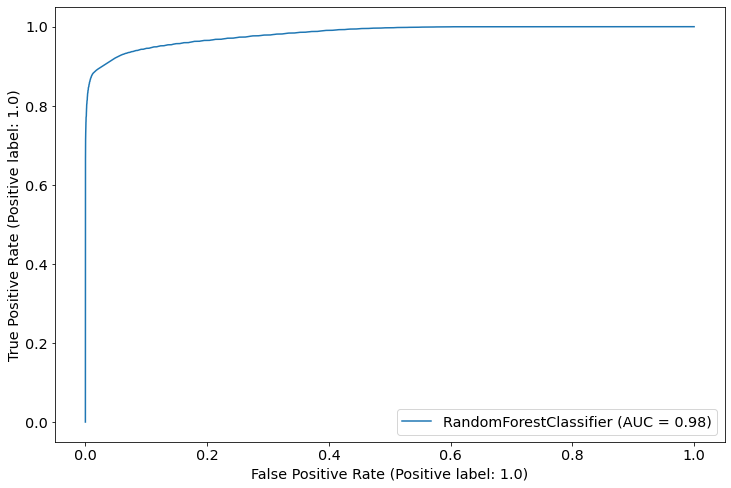


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 4014  5760]
 [ 7060 15853]]
ACCURACY SCORE:
0.6078
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.362471      0.733494  0.607795      0.547982      0.622551
recall        0.410681      0.691878  0.607795      0.551280      0.607795
f1-score      0.385073      0.712078  0.607795      0.548576      0.614298
support    9774.000000  22913.000000  0.607795  32687.000000  32687.000000


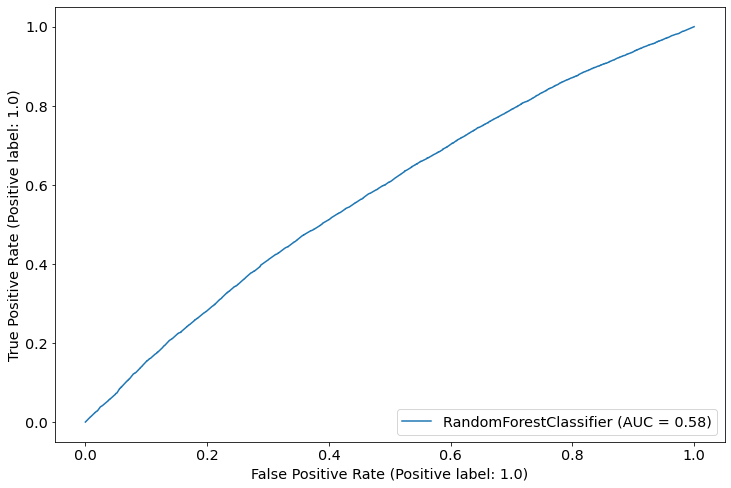

In [365]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
%time rf_clf.fit(X_ada, y_ada)
evaluate(rf_clf, X_ada, X_test, y_ada, y_test)

## Atribuindo Pesos

Wall time: 11.3 s
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[22493   423]
 [ 4311 49041]]
ACCURACY SCORE:
0.9379
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.839166      0.991448  0.937929      0.915307      0.945692
recall         0.981541      0.919197  0.937929      0.950369      0.937929
f1-score       0.904787      0.953957  0.937929      0.929372      0.939183
support    22916.000000  53352.000000  0.937929  76268.000000  76268.000000


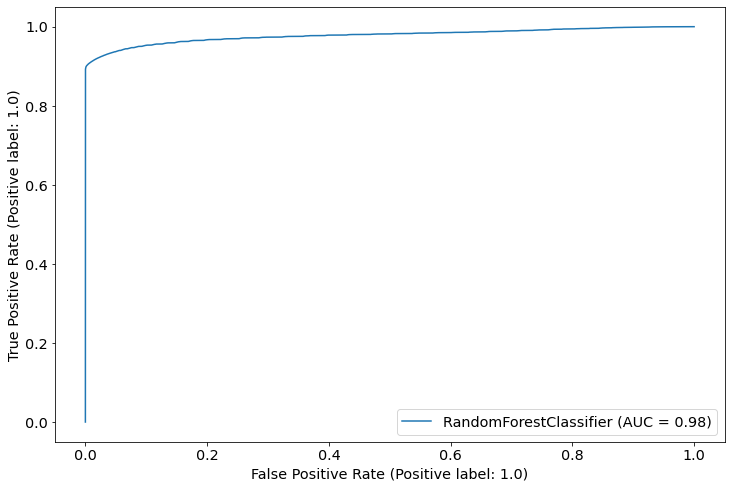


************************************************
TESTING RESULTS: 
CONFUSION MATRIX:
[[ 3007  6767]
 [ 4846 18067]]
ACCURACY SCORE:
0.6447
CLASSIFICATION REPORT:
                   0.0           1.0  accuracy     macro avg  weighted avg
precision     0.382911      0.727511  0.644721      0.555211      0.624469
recall        0.307653      0.788504  0.644721      0.548079      0.644721
f1-score      0.341181      0.756781  0.644721      0.548981      0.632509
support    9774.000000  22913.000000  0.644721  32687.000000  32687.000000


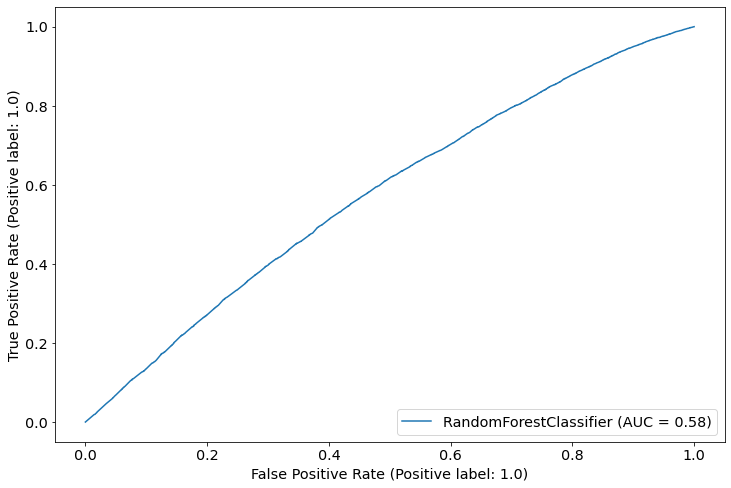

In [366]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, class_weight={  0:5  , 1:1  } )
%time rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)